# About this notebook

This notebook calculates a spectrum for a single photon energy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc
import scipy.interpolate, scipy.signal


mpl.rcParams['xtick.labelsize'] = 8 
mpl.rcParams['ytick.labelsize'] = 8 
mpl.rcParams['legend.fontsize'] = 8 
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['axes.labelsize'] = 9
mpl.rcParams['legend.frameon'] = False

# Multiprocessing
import multiprocessing as mp
from multiprocessing import Pool

# For the progress bar
from ipywidgets import IntProgress
from IPython.display import display

# This package
import XNLdyn

%matplotlib inline

import warnings
warnings.filterwarnings('default')


#### Prepare for saving results
from datetime import datetime
import os
import pickle
save_parent_dir = './simulation_results/'
save_dirname = datetime.now().strftime("%d-%m-%Y_%H-%M/")
save_path = os.path.join(save_parent_dir,save_dirname)
# Make directory
try:
    os.mkdir(save_path)
except FileExistsError:
    print('Warning! Writing into existing directory!')





save_path

'./simulation_results/30-08-2022_18-39/'

In [2]:

pulse_energy_max = 0.3e-6 # Joule

## Set up the problem and modify the parameters a little
PAR = XNLdyn.XNLpars()
PAR.N_photens = 1
PAR.t0_i       = [0,]   # Arrival time on time-axis / fs
#PAR.tdur_sig_i = [13,]  # Rms pulse duration / fs
PAR.E_i_abs    = [851.5,] # Photon Energies of incident pulses / eV
PAR.lambda_res_Ei = (30,)
PAR.lambda_nonres = 940


PAR.I0_i =  [XNLdyn.photons_per_J(PAR.E_i_abs[0])*pulse_energy_max]

#* XNLdyn.photons_per_J(PAR.E_i_abs[0])

# Simulation Energy Axis:
N_points_E = 69#42#42# 23
Erange = 4

# Steps ...
N_local_fluences_to_calculate = 50
N_pulse_energies = 10

Nsteps_r = 100

pulse_profile_sigma= 400 # nm rms


In [3]:
pulse_energy_max_photons = pulse_energy_max *  XNLdyn.photons_per_J(PAR.E_i_abs[0])
pulse_energy_max_photons/PAR.atomic_density

24059135.215602644

In [4]:
sim = XNLdyn.XNLsim(PAR, DEBUG=True)
#PAR.FermiSolver.plot_lookup_tables(), load_tables = False

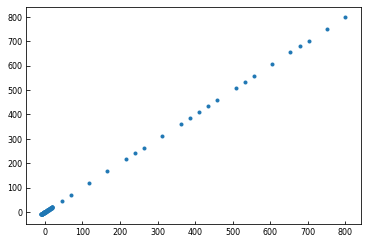

In [5]:
plt.figure()
plt.plot(sim.par.E_j,sim.par.E_j,'.')

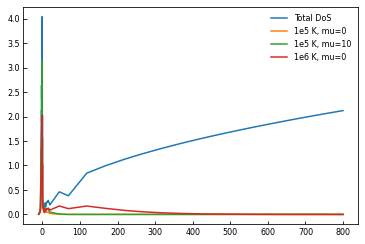

In [6]:
plt.figure()
plt.plot(PAR.E_j,PAR.m_j/PAR.enax_dE_j, label ='Total DoS')
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e5*PAR.kB,0)*PAR.m_j/PAR.enax_dE_j, label = '1e5 K, mu=0')
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e5*PAR.kB,10)*PAR.m_j/PAR.enax_dE_j, label = '1e5 K, mu=10')
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e6*PAR.kB,0)*PAR.m_j/PAR.enax_dE_j, label = '1e6 K, mu=0')
plt.legend()

# Determine Fluences to calculate

In [7]:
%%time


fluences_joules_nm2, dA = XNLdyn.calculate_fluences(Nsteps_r, pulse_energy_max, pulse_profile_sigma) 

fluences_simulated_joules_nm2 = np.logspace(np.log10(np.min(fluences_joules_nm2*1e-5)),
                                 np.log10(np.max(fluences_joules_nm2)),
                                 N_local_fluences_to_calculate)

fluences_simulated_joules_cm2 = fluences_simulated_joules_nm2 * 1e14
fluences_simulated_photons_nm2_rough = fluences_simulated_joules_nm2 * XNLdyn.photons_per_J(850)

CPU times: user 63 µs, sys: 241 µs, total: 304 µs
Wall time: 291 µs


## Run a simulation for a single Fluence

Simulating for  5.011708018478251 photons per atom
Initializing a simulation where ['I0_i'] are changed to [13742.103386667364]

t:  -42.0
-20.557944155578824 9.701699913547204 -> 300.0 0.0
Photons impinging per atom this timestep:  [2.28278648] i.e.  [0.02497578] /atom
t:  -41.99965630762418
-20.557943850672658 9.70170019082057 -> 310.00022395161284 0.0002083828550103547
Photons impinging per atom this timestep:  [2.28298147] i.e.  [0.02497792] /atom
t:  -41.9961254320397
-20.55794071826172 9.701703039349754 -> 352.47569825445737 0.0010938186852568125
Photons impinging per atom this timestep:  [2.28498556] i.e.  [0.02499984] /atom
t:  -41.99418814805954
-20.557938708541588 9.701704586488306 -> 365.96910603769055 0.001375249478359215
Photons impinging per atom this timestep:  [2.28608581] i.e.  [0.02501188] /atom
t:  -41.984501728158776
-20.557927968545957 9.701712305712467 -> 405.1382642466563 0.0021930065816915165
Photons impinging per atom this timestep:  [2.29159428] i.e.  [0.02507

Photons impinging per atom this timestep:  [3.63285781] i.e.  [0.0397468] /atom
t:  -40.060207766332816
-20.285827304226878 9.7022738074147 -> 4656.3260048007005 0.27283448605790694
Photons impinging per atom this timestep:  [3.65590202] i.e.  [0.03999893] /atom
t:  -40.026874432999485
-20.27401772704906 9.702274978085478 -> 4772.607545834729 0.28490530172271766
Photons impinging per atom this timestep:  [3.68489116] i.e.  [0.0403161] /atom
t:  -40.026874432999485
-20.274282365298205 9.702274207094895 -> 4770.014474949969 0.2846341852079442
Photons impinging per atom this timestep:  [3.68489116] i.e.  [0.0403161] /atom
t:  -39.96687443299948
-20.252757180336527 9.702276251459972 -> 4978.771172713487 0.3065969403469502
Photons impinging per atom this timestep:  [3.73759016] i.e.  [0.04089267] /atom
t:  -39.93687443299949
-20.2409594647384 9.702276833413064 -> 5091.517783885483 0.3186081706601931
Photons impinging per atom this timestep:  [3.76419155] i.e.  [0.04118372] /atom
t:  -39.786

Photons impinging per atom this timestep:  [6.10277016] i.e.  [0.06676991] /atom
t:  -37.68687443299951
-18.720102742120716 9.702181925078202 -> 16178.235766371039 1.6843854399349998
Photons impinging per atom this timestep:  [6.31077979] i.e.  [0.06904573] /atom
t:  -37.66020776633284
-18.694329306260588 9.702180007040546 -> 16337.893174414325 1.7045008146366698
Photons impinging per atom this timestep:  [6.34840622] i.e.  [0.0694574] /atom
t:  -37.62687443299951
-18.661778860144686 9.702177396622195 -> 16538.454190904453 1.7297368611551467
Photons impinging per atom this timestep:  [6.39571704] i.e.  [0.06997502] /atom
t:  -37.62687443299951
-18.661694905438495 9.702177177272553 -> 16538.96947017774 1.729801359397589
Photons impinging per atom this timestep:  [6.39571704] i.e.  [0.06997502] /atom
t:  -37.566874432999505
-18.602871594167258 9.7021724810934 -> 16898.358610523977 1.77492581313996
Photons impinging per atom this timestep:  [6.48165939] i.e.  [0.07091531] /atom
t:  -37.53

Photons impinging per atom this timestep:  [10.5953587] i.e.  [0.11592296] /atom
t:  -35.26020776633286
-15.685489085291195 9.701990412962632 -> 30727.93288548506 3.3473932108290065
Photons impinging per atom this timestep:  [10.65449524] i.e.  [0.11656997] /atom
t:  -35.22687443299953
-15.634675280775214 9.701987965879706 -> 30918.841298094823 3.366329762054069
Photons impinging per atom this timestep:  [10.7288168] i.e.  [0.11738312] /atom
t:  -35.22687443299953
-15.634607994831766 9.701987704779176 -> 30919.093624420224 3.3663542839027305
Photons impinging per atom this timestep:  [10.7288168] i.e.  [0.11738312] /atom
t:  -35.16687443299953
-15.542940113209712 9.70198331890091 -> 31260.609757455524 3.4000262008251485
Photons impinging per atom this timestep:  [10.8637245] i.e.  [0.11885913] /atom
t:  -35.136874432999534
-15.496247997184085 9.70198114888872 -> 31433.17343293617 3.416940982844647
Photons impinging per atom this timestep:  [10.93172584] i.e.  [0.11960313] /atom
t:  -34

t:  -32.886874432999555
-11.494586210663794 9.701830575635332 -> 43947.81340608355 4.471903713339423
Photons impinging per atom this timestep:  [17.19278816] i.e.  [0.1881049] /atom
t:  -32.860207766332884
-11.441004315769183 9.701829093256407 -> 44095.699330871525 4.482469245303305
Photons impinging per atom this timestep:  [17.28220137] i.e.  [0.18908317] /atom
t:  -32.82687443299955
-11.373823616006046 9.701826945207879 -> 44280.65393115802 4.495625321573509
Photons impinging per atom this timestep:  [17.39451915] i.e.  [0.19031203] /atom
t:  -32.82687443299955
-11.373822287396976 9.701826621903063 -> 44280.658785823136 4.495625036732933
Photons impinging per atom this timestep:  [17.39451915] i.e.  [0.19031203] /atom
t:  -32.76687443299955
-11.25269626509099 9.701822771035156 -> 44612.85118719262 4.519095564497242
Photons impinging per atom this timestep:  [17.59824227] i.e.  [0.19254094] /atom
t:  -32.73687443299956
-11.191317217938364 9.701820837671951 -> 44780.571719228006 4.530

Photons impinging per atom this timestep:  [26.96341963] i.e.  [0.29500459] /atom
t:  -30.46020776633289
-6.026566304953091 9.701666440433476 -> 57905.81441134197 5.309600174324728
Photons impinging per atom this timestep:  [27.09338406] i.e.  [0.29642652] /atom
t:  -30.426874432999554
-5.942997324088906 9.70166394302584 -> 58107.22950656482 5.319609644495194
Photons impinging per atom this timestep:  [27.25655958] i.e.  [0.29821181] /atom
t:  -30.426874432999554
-5.943035561208063 9.701663550626066 -> 58107.1397169418 5.319604372648141
Photons impinging per atom this timestep:  [27.25655958] i.e.  [0.29821181] /atom
t:  -30.366874432999555
-5.792397237060499 9.701659067802332 -> 58469.572655227 5.337485557699563
Photons impinging per atom this timestep:  [27.55229955] i.e.  [0.30144748] /atom
t:  -30.336874432999554
-5.716224750725905 9.701656787015375 -> 58652.53728942978 5.34644916049652
Photons impinging per atom this timestep:  [27.7011494] i.e.  [0.30307603] /atom
t:  -30.1868744

t:  -28.23687443299955
0.07313455244188849 9.701476797432287 -> 72029.88888540264 5.898044521308571
Photons impinging per atom this timestep:  [39.86081051] i.e.  [0.4361139] /atom
t:  -28.086874432999547
0.5242063092993503 9.701462162299446 -> 73030.14296108276 5.931789685100307
Photons impinging per atom this timestep:  [40.86971789] i.e.  [0.44715227] /atom
t:  -28.060207766332883
0.6049739686403863 9.701459817518751 -> 73208.59065537891 5.93770896631131
Photons impinging per atom this timestep:  [41.05116211] i.e.  [0.44913744] /atom
t:  -28.02687443299955
0.7061080683055359 9.701456467563316 -> 73431.75821763469 5.945067692713617
Photons impinging per atom this timestep:  [41.27885633] i.e.  [0.45162863] /atom
t:  -28.02687443299955
0.7060500960181371 9.701456023620281 -> 73431.63385198463 5.945062607321822
Photons impinging per atom this timestep:  [41.27885633] i.e.  [0.45162863] /atom
t:  -27.96687443299955
0.8883265441855879 9.701450003689782 -> 73833.06369370001 5.95817942860

Photons impinging per atom this timestep:  [57.7178229] i.e.  [0.63148603] /atom
t:  -25.866874432999545
7.8195249388846 9.701205308858482 -> 88316.2695506277 6.332543365316154
Photons impinging per atom this timestep:  [58.25093662] i.e.  [0.63731878] /atom
t:  -25.836874432999544
7.926783841559464 9.70120126345544 -> 88528.29037068173 6.336638191568919
Photons impinging per atom this timestep:  [58.51886973] i.e.  [0.64025022] /atom
t:  -25.68687443299954
8.464248677414888 9.701181162922856 -> 89585.23933078002 6.356468495243889
Photons impinging per atom this timestep:  [59.87235209] i.e.  [0.65505856] /atom
t:  -25.660207766332878
8.560434667446673 9.70117786173336 -> 89773.43316253714 6.359898293748406
Photons impinging per atom this timestep:  [60.11539004] i.e.  [0.65771762] /atom
t:  -25.626874432999543
8.680857926964887 9.701173275920187 -> 90008.64493902003 6.364140700839478
Photons impinging per atom this timestep:  [60.42021777] i.e.  [0.66105271] /atom
t:  -25.626874432999

Photons impinging per atom this timestep:  [81.99980707] i.e.  [0.89715325] /atom
t:  -23.46687443299954
17.099813826903052 9.700832518413392 -> 105410.1926225977 6.5385252194147085
Photons impinging per atom this timestep:  [82.68671763] i.e.  [0.90466868] /atom
t:  -23.436874432999538
17.226017454647888 9.700827106479757 -> 105626.85462614633 6.539539249225872
Photons impinging per atom this timestep:  [83.03166447] i.e.  [0.90844272] /atom
t:  -23.286874432999536
17.858307020493854 9.70080017619401 -> 106706.73381647644 6.544004851023489
Photons impinging per atom this timestep:  [84.77133256] i.e.  [0.92747629] /atom
t:  -23.260207766332872
17.971402740644557 9.700795677350914 -> 106898.91062749129 6.544697649253621
Photons impinging per atom this timestep:  [85.08321519] i.e.  [0.93088857] /atom
t:  -23.226874432999537
18.112989590004226 9.700789559601194 -> 107139.09402215456 6.545518678220156
Photons impinging per atom this timestep:  [85.47417681] i.e.  [0.93516605] /atom
t:  -

Photons impinging per atom this timestep:  [112.59360654] i.e.  [1.23187753] /atom
t:  -21.066874432999533
27.95538567581552 9.7003451415341 -> 122859.60365002563 6.495370048194789
Photons impinging per atom this timestep:  [113.44010046] i.e.  [1.24113895] /atom
t:  -21.036874432999532
28.102082717506264 9.700338261211463 -> 123081.33625568514 6.493223487069052
Photons impinging per atom this timestep:  [113.86482139] i.e.  [1.24578579] /atom
t:  -20.88687443299953
28.83692165084274 9.700303999477457 -> 124187.29909452467 6.481932005651889
Photons impinging per atom this timestep:  [116.00313093] i.e.  [1.26918086] /atom
t:  -20.860207766332866
28.96828822645055 9.700298211795381 -> 124384.18569807701 6.479820737287881
Photons impinging per atom this timestep:  [116.38583517] i.e.  [1.273368] /atom
t:  -20.82687443299953
29.132742266607284 9.700290465186704 -> 124630.32204150961 6.477136701873909
Photons impinging per atom this timestep:  [116.86529994] i.e.  [1.27861378] /atom
t:  -2

Photons impinging per atom this timestep:  [149.42134483] i.e.  [1.63480684] /atom
t:  -18.726874432999526
40.165406329828414 9.699759840445635 -> 140384.27667810288 6.207658099994315
Photons impinging per atom this timestep:  [149.42134483] i.e.  [1.63480684] /atom
t:  -18.666874432999528
40.4998185367022 9.699743544141539 -> 140841.68060220097 6.197036034358568
Photons impinging per atom this timestep:  [150.41649451] i.e.  [1.64569469] /atom
t:  -18.636874432999527
40.66827584377795 9.699735317049582 -> 141071.70691438115 6.1916362045509725
Photons impinging per atom this timestep:  [150.91534645] i.e.  [1.65115259] /atom
t:  -18.486874432999524
41.511981102002544 9.699694330421664 -> 142219.92914706847 6.1641040233647955
Photons impinging per atom this timestep:  [153.42227646] i.e.  [1.67858071] /atom
t:  -18.46020776633286
41.662732509625314 9.699687348422064 -> 142424.42067649282 6.159100857213481
Photons impinging per atom this timestep:  [153.87014827] i.e.  [1.68348083] /atom

Photons impinging per atom this timestep:  [191.03352067] i.e.  [2.09008228] /atom
t:  -16.32687443299952
54.44450477849864 9.699062612707554 -> 159126.41387652775 5.65076384931018
Photons impinging per atom this timestep:  [191.65032577] i.e.  [2.0968307] /atom
t:  -16.32687443299952
54.44446812407885 9.69906211006693 -> 159126.37481914836 5.650763750319152
Photons impinging per atom this timestep:  [191.65032577] i.e.  [2.0968307] /atom
t:  -16.266874432999522
54.82430727033108 9.699043623742801 -> 159605.82122724678 5.633357631405614
Photons impinging per atom this timestep:  [192.7624042] i.e.  [2.10899786] /atom
t:  -16.23687443299952
55.015528275091036 9.699034320000646 -> 159846.8614662024 5.624549335078423
Photons impinging per atom this timestep:  [193.31931669] i.e.  [2.11509099] /atom
t:  -16.08687443299952
55.973101272078 9.698987952592775 -> 161050.670563122 5.579986238756644
Photons impinging per atom this timestep:  [196.11244061] i.e.  [2.14565033] /atom
t:  -16.0602077

Photons impinging per atom this timestep:  [233.47055193] i.e.  [2.55438241] /atom
t:  -13.986874432999516
70.14619871098411 9.698310462290788 -> 178303.63607802836 4.839857290763336
Photons impinging per atom this timestep:  [236.4027473] i.e.  [2.58646332] /atom
t:  -13.960207766332848
70.33546501035096 9.698301913019424 -> 178527.57400833617 4.8290453531201765
Photons impinging per atom this timestep:  [236.92456631] i.e.  [2.5921725] /atom
t:  -13.926874432999515
70.57235821864568 9.698290819752536 -> 178807.65120812957 4.8154795087287745
Photons impinging per atom this timestep:  [237.57705435] i.e.  [2.59931132] /atom
t:  -13.926874432999515
70.57233712030738 9.698290369125584 -> 178807.63345847782 4.815478951878789
Photons impinging per atom this timestep:  [237.57705435] i.e.  [2.59931132] /atom
t:  -13.866874432999515
70.99907408440174 9.698270403197148 -> 179311.55098007838 4.790953256918112
Photons impinging per atom this timestep:  [238.75210875] i.e.  [2.61216749] /atom
t:

Photons impinging per atom this timestep:  [278.80162547] i.e.  [3.05034601] /atom
t:  -11.82687443299951
86.23455876940892 9.697579889780764 -> 196826.57167042786 3.847022615177824
Photons impinging per atom this timestep:  [278.80162547] i.e.  [3.05034601] /atom
t:  -11.76687443299951
86.70279821165161 9.697559393371312 -> 197351.24050456795 3.816080465576581
Photons impinging per atom this timestep:  [279.97176213] i.e.  [3.06314838] /atom
t:  -11.73687443299951
86.93824820923335 9.697549135936768 -> 197614.77786125094 3.8004815959407563
Photons impinging per atom this timestep:  [280.55642969] i.e.  [3.06954518] /atom
t:  -11.58687443299951
88.11696904506768 9.697498008941416 -> 198931.24213260348 3.7219911259114085
Photons impinging per atom this timestep:  [283.47548768] i.e.  [3.10148236] /atom
t:  -11.560207766332843
88.32728772233642 9.697489169518253 -> 199165.6343427334 3.707917854007258
Photons impinging per atom this timestep:  [283.99364354] i.e.  [3.10715146] /atom
t:  -

Photons impinging per atom this timestep:  [323.61420171] i.e.  [3.54063678] /atom
t:  -9.426874432999504
105.90171430810707 9.696766445089246 -> 218251.29060156338 2.464066285854875
Photons impinging per atom this timestep:  [324.2175374] i.e.  [3.54723783] /atom
t:  -9.426874432999504
105.90175231705412 9.696766105321505 -> 218251.33722243283 2.4640618581158074
Photons impinging per atom this timestep:  [324.2175374] i.e.  [3.54723783] /atom
t:  -9.366874432999504
106.41657757512584 9.69674613406818 -> 218796.37709508208 2.4257712801603457
Photons impinging per atom this timestep:  [325.300988] i.e.  [3.55909177] /atom
t:  -9.336874432999505
106.67527051098595 9.696736177757552 -> 219069.96637824853 2.4064944499031804
Photons impinging per atom this timestep:  [325.84146738] i.e.  [3.56500511] /atom
t:  -9.186874432999504
107.97012419881246 9.696686571915736 -> 220436.53372501113 2.3096423426945747
Photons impinging per atom this timestep:  [328.53111942] i.e.  [3.59443238] /atom
t: 

Photons impinging per atom this timestep:  [363.89188217] i.e.  [3.98131162] /atom
t:  -7.026874432999502
127.38248608000418 9.696001375740318 -> 240387.38326380833 0.7909323530777037
Photons impinging per atom this timestep:  [364.39777342] i.e.  [3.98684654] /atom
t:  -7.026874432999502
127.38256594993642 9.696001090267421 -> 240387.46913000743 0.7909243894629661
Photons impinging per atom this timestep:  [364.39777342] i.e.  [3.98684654] /atom
t:  -6.966874432999503
127.94111767188483 9.695983055373745 -> 240947.4810425421 0.7455288459429616
Photons impinging per atom this timestep:  [365.30409823] i.e.  [3.99676256] /atom
t:  -6.9368744329995025
128.22156182110152 9.69597410947259 -> 241228.37702984756 0.7227034599908018
Photons impinging per atom this timestep:  [365.75518388] i.e.  [4.00169785] /atom
t:  -6.786874432999502
129.62501742828016 9.69592957712007 -> 242631.30279964846 0.6081461953775549
Photons impinging per atom this timestep:  [367.98958428] i.e.  [4.02614425] /atom

Photons impinging per atom this timestep:  [393.17446487] i.e.  [4.30168999] /atom
t:  -4.836874432999504
148.43283958520408 9.695394560801189 -> 261006.46019478102 -0.9763242953096413
Photons impinging per atom this timestep:  [393.51324384] i.e.  [4.30539654] /atom
t:  -4.686874432999503
149.92066747843444 9.695357430761394 -> 262428.16228077124 -1.1053040638308225
Photons impinging per atom this timestep:  [395.17995347] i.e.  [4.32363188] /atom
t:  -4.660207766332837
150.18567203543105 9.695351047495478 -> 262680.9214838465 -1.1283287890944915
Photons impinging per atom this timestep:  [395.4714834] i.e.  [4.32682148] /atom
t:  -4.626874432999504
150.5172916717685 9.695342898312358 -> 262997.0252782404 -1.1571645906742312
Photons impinging per atom this timestep:  [395.83385605] i.e.  [4.33078617] /atom
t:  -4.626874432999504
150.51741287095783 9.695342654331146 -> 262997.1460063059 -1.1571765162642536
Photons impinging per atom this timestep:  [395.83385605] i.e.  [4.33078617] /at

Photons impinging per atom this timestep:  [413.82407193] i.e.  [4.52761567] /atom
t:  -2.526874432999505
171.9229893187783 9.694897127784058 -> 282964.9646417727 -3.0674750525949306
Photons impinging per atom this timestep:  [413.82407193] i.e.  [4.52761567] /atom
t:  -2.466874432999505
172.547975102405 9.694886466399991 -> 283535.8133018617 -3.124616354107721
Photons impinging per atom this timestep:  [414.19107483] i.e.  [4.53163102] /atom
t:  -2.436874432999505
172.8612589249324 9.694881274466418 -> 283821.713395758 -3.1532862288416497
Photons impinging per atom this timestep:  [414.37138824] i.e.  [4.53360381] /atom
t:  -2.286874432999505
174.4284440830718 9.694855555581716 -> 285249.48570849554 -3.29698180075913
Photons impinging per atom this timestep:  [415.24096198] i.e.  [4.54311775] /atom
t:  -2.2602077663328384
174.70739933884886 9.694851204575947 -> 285503.1998698403 -3.3226061398914477
Photons impinging per atom this timestep:  [415.38995397] i.e.  [4.54474786] /atom
t:  

Photons impinging per atom this timestep:  [421.68382857] i.e.  [4.61360863] /atom
t:  -0.12687443299950496
197.42268719501277 9.694576709909096 -> 305761.4301293322 -5.455195015369659
Photons impinging per atom this timestep:  [421.69576739] i.e.  [4.61373925] /atom
t:  -0.12687443299950496
197.42286467855206 9.694576483621125 -> 305761.5910050733 -5.455213533112755
Photons impinging per atom this timestep:  [421.69576739] i.e.  [4.61373925] /atom
t:  -0.06687443299950496
198.07126766743139 9.694571224139612 -> 306328.9127622106 -5.517358897153911
Photons impinging per atom this timestep:  [421.71027114] i.e.  [4.61389793] /atom
t:  -0.036874432999504964
198.3959896183499 9.694568751698107 -> 306612.8122012514 -5.548506092198569
Photons impinging per atom this timestep:  [421.71415447] i.e.  [4.61394042] /atom
t:  0.11312556700049503
200.0200484758125 9.69455664945196 -> 308030.57839913084 -5.704539861010266
Photons impinging per atom this timestep:  [421.69988422] i.e.  [4.61378429] 

Photons impinging per atom this timestep:  [415.50287415] i.e.  [4.54598331] /atom
t:  2.2731255670004953
223.65985848815689 9.694481753548459 -> 328291.45141775237 -8.02160839053935
Photons impinging per atom this timestep:  [415.3179912] i.e.  [4.54396052] /atom
t:  2.2731255670004953
223.66004754064375 9.694481496120169 -> 328291.6175091404 -8.021629132788172
Photons impinging per atom this timestep:  [415.3179912] i.e.  [4.54396052] /atom
t:  2.3331255670004953
224.32175443275545 9.694482021018214 -> 328849.286020776 -8.087675889397008
Photons impinging per atom this timestep:  [414.97853373] i.e.  [4.54024654] /atom
t:  2.363125567000495
224.6528335446823 9.694482442491429 -> 329128.1266442 -8.120744533105867
Photons impinging per atom this timestep:  [414.80559551] i.e.  [4.53835444] /atom
t:  2.513125567000495
226.30834392853578 9.694484823565489 -> 330520.6338967492 -8.28633562511971
Photons impinging per atom this timestep:  [413.9089198] i.e.  [4.52854398] /atom
t:  2.5397922

Photons impinging per atom this timestep:  [395.69369367] i.e.  [4.32925267] /atom
t:  4.673125567000494
250.21760987932947 9.694615940823084 -> 350318.5609158598 -10.72018902062589
Photons impinging per atom this timestep:  [395.33044208] i.e.  [4.32527836] /atom
t:  4.673125567000494
250.21779621412364 9.69461562424786 -> 350318.7218250361 -10.72021079546764
Photons impinging per atom this timestep:  [395.33044208] i.e.  [4.32527836] /atom
t:  4.733125567000494
250.88221070753153 9.694621721011062 -> 350861.07539116265 -10.788946830149508
Photons impinging per atom this timestep:  [394.67089037] i.e.  [4.31806226] /atom
t:  4.763125567000494
251.21434595564628 9.694624912871667 -> 351132.0423832386 -10.823328458087369
Photons impinging per atom this timestep:  [394.33837722] i.e.  [4.31442426] /atom
t:  4.9131255670004945
252.8748093124971 9.694641153624802 -> 352485.23588871636 -10.995433688126742
Photons impinging per atom this timestep:  [392.64864224] i.e.  [4.295937] /atom
t:  4

Photons impinging per atom this timestep:  [363.6953781] i.e.  [3.97916169] /atom
t:  7.073125567000493
276.6750575059661 9.69495883212145 -> 371628.314653454 -13.501356101851941
Photons impinging per atom this timestep:  [363.6953781] i.e.  [3.97916169] /atom
t:  7.1331255670004925
277.33183905201054 9.69496972477755 -> 372150.30499533005 -13.571524668029408
Photons impinging per atom this timestep:  [362.77935942] i.e.  [3.9691396] /atom
t:  7.163125567000493
277.6598767700787 9.69497528413826 -> 372410.8988789012 -13.606590677754737
Photons impinging per atom this timestep:  [362.31932134] i.e.  [3.96410636] /atom
t:  7.313125567000493
279.29955133318254 9.695003364493749 -> 373712.28829115746 -13.782067220263395
Photons impinging per atom this timestep:  [359.99910824] i.e.  [3.9387211] /atom
t:  7.3397922336671595
279.59071878747835 9.695008681744865 -> 373943.17312285816 -13.813260377940356
Photons impinging per atom this timestep:  [359.58317219] i.e.  [3.93417037] /atom
t:  7.3

t:  9.413125567000495
301.9937850607667 9.695456426886645 -> 391535.232227262 -16.244650323512936
Photons impinging per atom this timestep:  [324.46609898] i.e.  [3.54995732] /atom
t:  9.439792233667163
302.2781595258624 9.695463172099432 -> 391756.4502373266 -16.27590081229058
Photons impinging per atom this timestep:  [323.98384371] i.e.  [3.544681] /atom
t:  9.473125567000496
302.633625933078 9.695471204735636 -> 392032.9152242861 -16.314981166297496
Photons impinging per atom this timestep:  [323.38011896] i.e.  [3.5380757] /atom
t:  9.473125567000496
302.6337738877685 9.695470713955643 -> 392033.0453466532 -16.315001889757433
Photons impinging per atom this timestep:  [323.38011896] i.e.  [3.5380757] /atom
t:  9.533125567000496
303.2734442069837 9.69548518491317 -> 392530.35944853566 -16.38536650419687
Photons impinging per atom this timestep:  [322.29090824] i.e.  [3.52615873] /atom
t:  9.563125567000496
303.5926760087807 9.69549249277917 -> 392778.45336460316 -16.420500266995663

Photons impinging per atom this timestep:  [283.74267068] i.e.  [3.10440559] /atom
t:  11.633125567000501
325.2760675068014 9.69603073222385 -> 409493.78328654915 -18.835247844764787
Photons impinging per atom this timestep:  [282.57621037] i.e.  [3.09164344] /atom
t:  11.6631255670005
325.58422092721645 9.696038964480417 -> 409729.5024462227 -18.869963932881177
Photons impinging per atom this timestep:  [281.99252706] i.e.  [3.08525741] /atom
t:  11.813125567000501
327.1240182222889 9.69608040048 -> 410906.62920090737 -19.043600571193796
Photons impinging per atom this timestep:  [279.06985203] i.e.  [3.05328066] /atom
t:  11.839792233667168
327.3972085173475 9.696088160663553 -> 411115.33730813424 -19.07443249214911
Photons impinging per atom this timestep:  [278.54956318] i.e.  [3.04758822] /atom
t:  11.873125567000502
327.73861762159623 9.696097363930457 -> 411376.12569198594 -19.112980626755796
Photons impinging per atom this timestep:  [277.8989216] i.e.  [3.0404696] /atom
t:  11

Photons impinging per atom this timestep:  [236.67176872] i.e.  [2.58940666] /atom
t:  14.033125567000507
349.3521901317413 9.69670798720407 -> 427772.7280962807 -21.580907428806466
Photons impinging per atom this timestep:  [235.49806933] i.e.  [2.57656531] /atom
t:  14.063125567000506
349.6444261892166 9.696716567406066 -> 427992.98165938095 -21.61464595760394
Photons impinging per atom this timestep:  [234.91152764] i.e.  [2.570148] /atom
t:  14.213125567000507
351.10445145290316 9.696759731774272 -> 429092.8284270717 -21.783350355731265
Photons impinging per atom this timestep:  [231.98212771] i.e.  [2.53809768] /atom
t:  14.239792233667174
351.3633720344362 9.696767823379295 -> 429287.7668722457 -21.8132896958798
Photons impinging per atom this timestep:  [231.46195687] i.e.  [2.53240653] /atom
t:  14.273125567000507
351.68687800627674 9.696777359056735 -> 429531.3106580571 -21.85071382764129
Photons impinging per atom this timestep:  [230.81201746] i.e.  [2.5252956] /atom
t:  14.

Photons impinging per atom this timestep:  [190.79468451] i.e.  [2.0874692] /atom
t:  16.37312556700051
371.4933724077702 9.697370446952943 -> 444362.4430913659 -24.16483618427842
Photons impinging per atom this timestep:  [190.79468451] i.e.  [2.0874692] /atom
t:  16.43312556700051
372.0424406359549 9.697387045418344 -> 444771.4649187463 -24.229625897235525
Photons impinging per atom this timestep:  [189.68680263] i.e.  [2.07534795] /atom
t:  16.46312556700051
372.3158509406421 9.697395299943766 -> 444975.09858731786 -24.261901080160754
Photons impinging per atom this timestep:  [189.1337656] i.e.  [2.06929722] /atom
t:  16.613125567000512
373.6815914125831 9.697436818562121 -> 445991.88006849564 -24.423246785877215
Photons impinging per atom this timestep:  [186.3777838] i.e.  [2.03914424] /atom
t:  16.639792233667176
373.9236753391589 9.697444623325236 -> 446172.02460779255 -24.451863515005495
Photons impinging per atom this timestep:  [185.88946171] i.e.  [2.03380155] /atom
t:  16.

Photons impinging per atom this timestep:  [149.64907963] i.e.  [1.63729846] /atom
t:  18.73979223366718
392.34320311616506 9.697997312973401 -> 459821.87753240205 -26.649181325707552
Photons impinging per atom this timestep:  [149.20753943] i.e.  [1.63246761] /atom
t:  18.773125567000516
392.62490494450896 9.698005634093692 -> 460029.7855807259 -26.683085758359447
Photons impinging per atom this timestep:  [148.6565661] i.e.  [1.62643945] /atom
t:  18.773125567000516
392.6249743566064 9.698004952635216 -> 460029.86127944355 -26.68310166826118
Photons impinging per atom this timestep:  [148.6565661] i.e.  [1.62643945] /atom
t:  18.833125567000515
393.1317127987642 9.698019944489138 -> 460403.79354904266 -26.74411282795285
Photons impinging per atom this timestep:  [147.66748958] i.e.  [1.61561805] /atom
t:  18.863125567000516
393.38382755943945 9.6980273731346 -> 460589.80563529144 -26.774478489474415
Photons impinging per atom this timestep:  [147.17424619] i.e.  [1.61022151] /atom
t:

Photons impinging per atom this timestep:  [112.78723133] i.e.  [1.23399597] /atom
t:  21.139792233667187
411.7180727744112 9.698555791593343 -> 474067.3433913199 -29.002010693060253
Photons impinging per atom this timestep:  [112.41187392] i.e.  [1.22988921] /atom
t:  21.173125567000522
411.9738310233007 9.698562908352832 -> 474254.6951296512 -29.033353631516768
Photons impinging per atom this timestep:  [111.94377095] i.e.  [1.22476773] /atom
t:  21.173125567000522
411.9738928825738 9.698562290515042 -> 474254.76335369685 -29.033368343024016
Photons impinging per atom this timestep:  [111.94377095] i.e.  [1.22476773] /atom
t:  21.23312556700052
412.4339049073973 9.69857511452799 -> 474591.6932182297 -29.089760540522015
Photons impinging per atom this timestep:  [111.1042515] i.e.  [1.21558262] /atom
t:  21.26312556700052
412.6625391007599 9.698581451882548 -> 474759.13376342074 -29.11779769109305
Photons impinging per atom this timestep:  [110.68597154] i.e.  [1.21100625] /atom
t:  2

427.72607705717 9.698987378839393 -> 485761.8840845436 -30.978009500053034
Photons impinging per atom this timestep:  [84.23226595] i.e.  [0.9215784] /atom
t:  23.363125567000527
427.93255005947594 9.698992743292274 -> 485912.316165819 -31.003684988735724
Photons impinging per atom this timestep:  [83.8838762] i.e.  [0.9177667] /atom
t:  23.51312556700053
428.9632459381704 9.69901971286423 -> 486663.1027382296 -31.131923476030046
Photons impinging per atom this timestep:  [82.15685995] i.e.  [0.89887155] /atom
t:  23.539792233667193
429.14558850611564 9.699024795541545 -> 486795.8881059421 -31.154618995236483
Photons impinging per atom this timestep:  [81.85243758] i.e.  [0.89554089] /atom
t:  23.573125567000528
429.37320973977194 9.699030678840614 -> 486961.652885541 -31.182960868954588
Photons impinging per atom this timestep:  [81.47301328] i.e.  [0.89138964] /atom
t:  23.573125567000528
429.37326298672906 9.699030181277971 -> 486961.71064608457 -31.182973448333417
Photons impinging

Photons impinging per atom this timestep:  [59.99756677] i.e.  [0.65642852] /atom
t:  25.673125567000532
442.88300087516495 9.699371365468743 -> 496779.4748725145 -32.87550817990086
Photons impinging per atom this timestep:  [59.99756677] i.e.  [0.65642852] /atom
t:  25.73312556700053
443.24527624579736 9.699380328596137 -> 497042.2059029647 -32.92117559424896
Photons impinging per atom this timestep:  [59.45255726] i.e.  [0.65046562] /atom
t:  25.763125567000532
443.42486786290885 9.699384758876015 -> 497172.4404478102 -32.943819950190466
Photons impinging per atom this timestep:  [59.18143912] i.e.  [0.64749933] /atom
t:  25.913125567000534
444.3210787846271 9.699407006046858 -> 497822.2397852037 -33.05687304216763
Photons impinging per atom this timestep:  [57.839661] i.e.  [0.63281905] /atom
t:  25.939792233667198
444.47947777894024 9.699411152534962 -> 497937.0614569495 -33.076860983467995
Photons impinging per atom this timestep:  [57.6035246] i.e.  [0.6302355] /atom
t:  25.97312

Photons impinging per atom this timestep:  [41.3730607] i.e.  [0.45265931] /atom
t:  28.039792233667203
456.09137624099276 9.699697863081402 -> 506341.25872893236 -34.54989263339834
Photons impinging per atom this timestep:  [41.19049971] i.e.  [0.45066192] /atom
t:  28.073125567000538
456.2618318596284 9.699702127431987 -> 506464.42829160596 -34.571625870947045
Photons impinging per atom this timestep:  [40.9631885] i.e.  [0.44817493] /atom
t:  28.073125567000538
456.2618435154028 9.699701950447373 -> 506464.4437558528 -34.5716295863758
Photons impinging per atom this timestep:  [40.9631885] i.e.  [0.44817493] /atom
t:  28.133125567000537
456.5682685461586 9.69970963029934 -> 506685.84906680783 -34.61070691169867
Photons impinging per atom this timestep:  [40.55651287] i.e.  [0.44372552] /atom
t:  28.163125567000538
456.71989457440844 9.699713441181753 -> 506795.398409735 -34.63004694325849
Photons impinging per atom this timestep:  [40.35436924] i.e.  [0.44151389] /atom
t:  28.313125

Photons impinging per atom this timestep:  [27.19322842] i.e.  [0.29751891] /atom
t:  30.473125567000544
467.3918993506233 9.69999443725209 -> 514494.74176822044 -35.99745666967019
Photons impinging per atom this timestep:  [27.03036317] i.e.  [0.29573702] /atom
t:  30.473125567000544
467.3918708369469 9.699994427655703 -> 514494.72158176947 -35.997453113148424
Photons impinging per atom this timestep:  [27.03036317] i.e.  [0.29573702] /atom
t:  30.533125567000543
467.64208378304795 9.70000146591213 -> 514674.9756468608 -36.02965723158198
Photons impinging per atom this timestep:  [26.73921686] i.e.  [0.29255161] /atom
t:  30.563125567000544
467.76562704721664 9.700004974636418 -> 514763.97116656316 -36.04556019265959
Photons impinging per atom this timestep:  [26.59460937] i.e.  [0.29096947] /atom
t:  30.713125567000546
468.3816328887748 9.700022504385583 -> 515207.6756816067 -36.12487931887884
Photons impinging per atom this timestep:  [25.88115085] i.e.  [0.28316358] /atom
t:  30.73

Photons impinging per atom this timestep:  [17.35091936] i.e.  [0.189835] /atom
t:  32.87312556700054
476.30788953100785 9.70027045536939 -> 520910.2430520386 -37.14890424242471
Photons impinging per atom this timestep:  [17.23883918] i.e.  [0.18860874] /atom
t:  32.87312556700054
476.307815190795 9.700270572015485 -> 520910.1847404232 -37.14889305109271
Photons impinging per atom this timestep:  [17.23883918] i.e.  [0.18860874] /atom
t:  32.933125567000545
476.5039930522569 9.700277381388455 -> 521051.1656515306 -37.17431624822832
Photons impinging per atom this timestep:  [17.03863388] i.e.  [0.18641831] /atom
t:  32.96312556700054
476.60061886487273 9.700280784487664 -> 521120.6003348702 -37.186839134959435
Photons impinging per atom this timestep:  [16.93926953] i.e.  [0.18533118] /atom
t:  33.11312556700054
477.0821834172402 9.700297740423602 -> 521466.6270684411 -37.24926602190565
Photons impinging per atom this timestep:  [16.44975835] i.e.  [0.17997547] /atom
t:  33.13979223366

Photons impinging per atom this timestep:  [10.75960212] i.e.  [0.11771994] /atom
t:  35.23979223366719
483.0698422307049 9.700536069838094 -> 525764.8103579314 -38.02721038212819
Photons impinging per atom this timestep:  [10.69996168] i.e.  [0.11706741] /atom
t:  35.27312556700052
483.1516972086272 9.700539766443852 -> 525823.511905113 -38.03786650902197
Photons impinging per atom this timestep:  [10.62581294] i.e.  [0.11625616] /atom
t:  35.27312556700052
483.15158259869526 9.700539952614008 -> 525823.4217887182 -38.03784905494394
Photons impinging per atom this timestep:  [10.62581294] i.e.  [0.11625616] /atom
t:  35.33312556700052
483.29862020378044 9.70054659343524 -> 525928.8658223132 -38.05699266266414
Photons impinging per atom this timestep:  [10.49346382] i.e.  [0.11480814] /atom
t:  35.363125567000516
483.37084881351427 9.700549910153503 -> 525980.6591210352 -38.066396623131844
Photons impinging per atom this timestep:  [10.42782542] i.e.  [0.11408999] /atom
t:  35.51312556

Photons impinging per atom this timestep:  [6.37734577] i.e.  [0.06977402] /atom
t:  37.6731255670005
488.1665933244605 9.7007984326524 -> 529416.594534019 -38.691672257781
Photons impinging per atom this timestep:  [6.33015471] i.e.  [0.06925771] /atom
t:  37.6731255670005
488.166454255313 9.700798633914397 -> 529416.4862466452 -38.69165130374404
Photons impinging per atom this timestep:  [6.33015471] i.e.  [0.06925771] /atom
t:  37.7331255670005
488.27148867752084 9.7008048725812 -> 529491.6663525683 -38.70536292169262
Photons impinging per atom this timestep:  [6.24598559] i.e.  [0.06833682] /atom
t:  37.76312556700049
488.3229392915475 9.700807979231671 -> 529528.4902482016 -38.71207924732238
Photons impinging per atom this timestep:  [6.20427209] i.e.  [0.06788044] /atom
t:  37.91312556700049
488.5791129167579 9.70082340697349 -> 529711.8328917631 -38.745524730409656
Photons impinging per atom this timestep:  [5.99936702] i.e.  [0.06563859] /atom
t:  37.93979223366716
488.62413993

Photons impinging per atom this timestep:  [3.64472272] i.e.  [0.03987662] /atom
t:  40.073125567000474
491.6664830365745 9.701034380176633 -> 531919.6314193573 -39.14882169909925
Photons impinging per atom this timestep:  [3.64472272] i.e.  [0.03987662] /atom
t:  40.13312556700048
491.73788410388295 9.701039873442 -> 531970.6481950129 -39.158152454785174
Photons impinging per atom this timestep:  [3.59319757] i.e.  [0.03931288] /atom
t:  40.16312556700047
491.7727594807989 9.701042597659866 -> 531995.5650004293 -39.162709644827586
Photons impinging per atom this timestep:  [3.5676803] i.e.  [0.0390337] /atom
t:  40.31312556700047
491.946325645376 9.701056115093282 -> 532119.5688037487 -39.1853921221823
Photons impinging per atom this timestep:  [3.44251151] i.e.  [0.03766424] /atom
t:  40.33979223366714
491.97680832002266 9.701058390644631 -> 532141.3507255648 -39.189377403183826
Photons impinging per atom this timestep:  [3.42067584] i.e.  [0.03742534] /atom
t:  40.37312556700047
492

Photons impinging per atom this timestep:  [11.4181012] i.e.  [0.12492452] /atom
Photons impinging per atom this timestep:  [12.14519985] i.e.  [0.13287965] /atom
Photons impinging per atom this timestep:  [12.91172186] i.e.  [0.1412661] /atom
Photons impinging per atom this timestep:  [13.7193134] i.e.  [0.1501019] /atom
Photons impinging per atom this timestep:  [14.56965646] i.e.  [0.15940543] /atom
Photons impinging per atom this timestep:  [15.4644673] i.e.  [0.16919548] /atom
Photons impinging per atom this timestep:  [16.40549492] i.e.  [0.17949119] /atom
Photons impinging per atom this timestep:  [17.39451915] i.e.  [0.19031203] /atom
Photons impinging per atom this timestep:  [18.43334866] i.e.  [0.20167778] /atom
Photons impinging per atom this timestep:  [19.52381872] i.e.  [0.21360852] /atom
Photons impinging per atom this timestep:  [20.66778877] i.e.  [0.2261246] /atom
Photons impinging per atom this timestep:  [21.86713977] i.e.  [0.23924661] /atom
Photons impinging per 

Photons impinging per atom this timestep:  [407.31537357] i.e.  [4.45640452] /atom
Photons impinging per atom this timestep:  [409.69160588] i.e.  [4.48240269] /atom
Photons impinging per atom this timestep:  [411.86230749] i.e.  [4.50615216] /atom
Photons impinging per atom this timestep:  [413.82407193] i.e.  [4.52761567] /atom
Photons impinging per atom this timestep:  [415.57381012] i.e.  [4.54675941] /atom
Photons impinging per atom this timestep:  [417.1087585] i.e.  [4.56355316] /atom
Photons impinging per atom this timestep:  [418.4264863] i.e.  [4.57797031] /atom
Photons impinging per atom this timestep:  [419.52490192] i.e.  [4.58998799] /atom
Photons impinging per atom this timestep:  [420.40225853] i.e.  [4.59958707] /atom
Photons impinging per atom this timestep:  [421.05715862] i.e.  [4.60675228] /atom
Photons impinging per atom this timestep:  [421.48855776] i.e.  [4.61147219] /atom
Photons impinging per atom this timestep:  [421.69576739] i.e.  [4.61373925] /atom
Photon

Photons impinging per atom this timestep:  [31.71682394] i.e.  [0.3470112] /atom
Photons impinging per atom this timestep:  [30.08673325] i.e.  [0.32917651] /atom
Photons impinging per atom this timestep:  [28.52522632] i.e.  [0.31209219] /atom
Photons impinging per atom this timestep:  [27.03036317] i.e.  [0.29573702] /atom
Photons impinging per atom this timestep:  [25.60020139] i.e.  [0.28008973] /atom
Photons impinging per atom this timestep:  [24.23280021] i.e.  [0.26512911] /atom
Photons impinging per atom this timestep:  [22.92622448] i.e.  [0.25083397] /atom
Photons impinging per atom this timestep:  [21.67854839] i.e.  [0.23718324] /atom
Photons impinging per atom this timestep:  [20.48785892] i.e.  [0.22415601] /atom
Photons impinging per atom this timestep:  [19.35225912] i.e.  [0.2117315] /atom
Photons impinging per atom this timestep:  [18.26987117] i.e.  [0.19988918] /atom
Photons impinging per atom this timestep:  [17.23883918] i.e.  [0.18860874] /atom
Photons impinging 

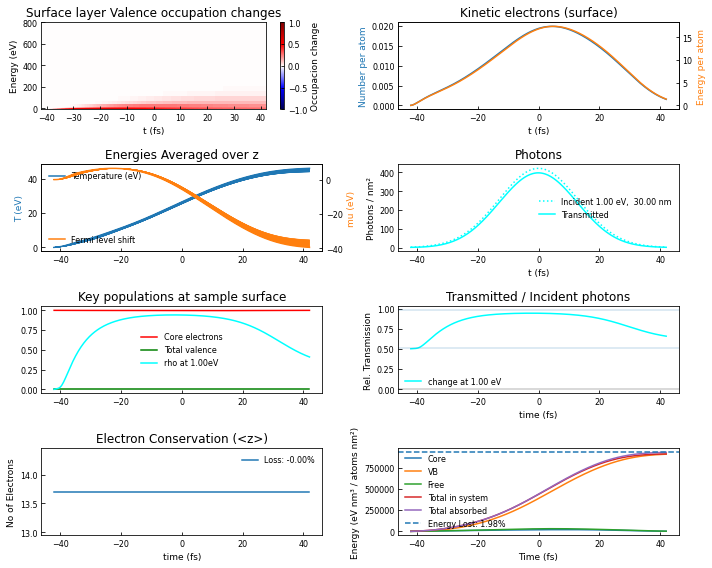

Done
Transmission:  [92.03765191]  %
CPU times: user 15min 9s, sys: 1h 26min 42s, total: 1h 41min 52s
Wall time: 1min 52s


(array([13725.12891428]), array([12632.28637445]))

In [8]:
%%time

print('Simulating for ', 1*np.max(fluences_simulated_joules_nm2)* XNLdyn.photons_per_J(PAR.E_i_abs[0])/(PAR.atomic_density*PAR.lambda_res_Ei[0]) ,'photons per atom')

XNLdyn.run_modified_simulation(PAR, dict(t_span=[-42, 42],method='RK45', rtol=1e-4, atol=1e-8, plot = True),
                               ['I0_i',] , [1*np.max(fluences_simulated_joules_nm2)* XNLdyn.photons_per_J(PAR.E_i_abs[0]),], debug =True)

In [9]:
fluences_simulated_joules_nm2

array([1.00649892e-22, 1.63082705e-22, 2.64242394e-22, 4.28151122e-22,
       6.93731919e-22, 1.12405165e-21, 1.82129736e-21, 2.95104240e-21,
       4.78156474e-21, 7.74755433e-21, 1.25533380e-20, 2.03401341e-20,
       3.29570554e-20, 5.34002135e-20, 8.65241983e-20, 1.40194887e-19,
       2.27157335e-19, 3.68062317e-19, 5.96370217e-19, 9.66296791e-19,
       1.56568766e-18, 2.53687880e-18, 4.11049675e-18, 6.66022498e-18,
       1.07915416e-17, 1.74855010e-17, 2.83317025e-17, 4.59057686e-17,
       7.43809727e-17, 1.20519257e-16, 1.95276973e-16, 3.16406667e-16,
       5.12672729e-16, 8.30682013e-16, 1.34595146e-15, 2.18084092e-15,
       3.53360970e-15, 5.72549671e-15, 9.27700435e-15, 1.50315010e-14,
       2.43554939e-14, 3.94631304e-14, 6.39419863e-14, 1.03605000e-13,
       1.67870856e-13, 2.72000621e-13, 4.40721752e-13, 7.14100071e-13,
       1.15705410e-12, 1.87477113e-12])

# Load a spectrum to simulate

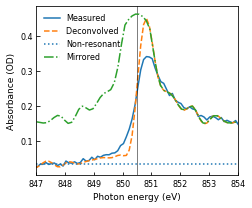

In [10]:
#load_spectrum_file = '../../../Eval4/NL-Spectra_runs_[141, 148, 151, 158, 164]_base.npy'


deconv_spectrum_file = '../Deconvolved_Cold_Spectrum.npy'

E_fermi = 850.5 # This is just where the spectrum is mirrored

aufloesung = np.sqrt((0.34/2.35)**2 + (0.48/2.35)**2) # Assuming 340 meV beamline and 480 meV CHL, both FWHM converting to sigma


show_lambda = False

ld = np.load(deconv_spectrum_file,allow_pickle=True).item()

spec = ld['Spectrum_deconv'][10:-10]
#spec_sm = ld['Spectrum_sm0'][10:-10]
#spec_sm =  sc.signal.savgol_filter(spec,15,4, mode='interp')
#dE = ld['Enax'][1]-ld['Enax'][0]
#spec_sm = sc.ndimage.gaussian_filter(spec,aufloesung/dE)
enax = ld['Enax'][10:-10]

OD_nonres = np.mean(spec[enax<849])#spec_sm[0]

A_spec = 10**(spec-OD_nonres)

lambda_nonres = PAR.Z / np.log(10**OD_nonres)
spec_lambda= PAR.Z / np.log(A_spec)

#plt.figure(figsize = (3*3.5,2*3))
plt.figure(figsize = (3.5,3))

ax1 = plt.gca()
#plt.plot(enax, spec, 'C1.')
plt.plot(enax, ld['Spectrum0'][10:-10], c='C0', ls = '-', label = 'Measured')
plt.plot(enax, spec, marker='',c='C1', ls = '--', label = 'Deconvolved ')
plt.axhline(OD_nonres,  c= 'C0', ls = ':', label = 'Non-resonant')
plt.ylabel('Absorbance (OD)')#, color = 'C1')
plt.axvline( E_fermi,c='k', lw=0.5)
plt.xlabel('Photon energy (eV)')

if show_lambda:
    ax2 = plt.gca().twinx()
    plt.semilogy(enax[enax>849], spec_lambda[enax>849], c='C0', ls = '--', label = 'Measured spectrum as lambda')
    plt.axhline(lambda_nonres, c= 'C0', ls = ':', label = 'Non-resonant absorption level')
    plt.ylabel('lambda (nm)', color ='C0')


######### Transfer to simulated axis



E_min, E_max = E_fermi-Erange, E_fermi+Erange+0.4
enax_abs = np.linspace(E_min, E_max, N_points_E) # Absolute energy axis to sample
enax_rel = enax_abs-E_fermi # Relative energy axis to Fermi Energy, i.e. detuning

enax_abs_fine = np.linspace(E_min, E_max, 500)
enax_rel_fine = enax_abs_fine - E_fermi

dE = enax_abs[1]-enax_abs[0]

## Mirror the spectrum

pendepths_res_fine = np.interp(enax_abs_fine, enax,spec_lambda)
pendepths_res_symm_fine = pendepths_res_fine.copy()
pendepths_res_symm_fine[enax_rel_fine>=0] = np.interp(enax_rel_fine[enax_rel_fine>=0],
                                                     enax-E_fermi,spec_lambda)
pendepths_res_symm_fine[enax_rel_fine<0] = np.interp(-enax_rel_fine[enax_rel_fine<0],
                                                     enax-E_fermi,spec_lambda)

## Interpolate the resonance peak
use_for_interp = np.abs(E_fermi-enax_abs_fine)>0.41   # Boolean mask excluding the middle
f_interp = sc.interpolate.interp1d(enax_rel_fine[use_for_interp],pendepths_res_symm_fine[use_for_interp], kind='cubic')
pendepths_res_symm_fine[~use_for_interp]=np.nan
pendepths_res_symm_fine = f_interp(enax_rel_fine)


if show_lambda:
    plt.semilogy(enax_abs_fine, pendepths_res_symm_fine, c='C0', ls = '-.', label = 'mirrored Spectrum')
    plt.ylim(None, np.max(pendepths_res_symm_fine)*1.1)

## Calculate backwards to be sure
pendepths_res_symm = np.interp(enax_abs, enax_abs_fine, pendepths_res_symm_fine)
abs_backwards = np.exp(-PAR.Z/pendepths_res_symm)# * np.exp(-PAR.Z/lambda_nonres) 

resonant_spectrum_OD_given = -np.log10(abs_backwards) 
sharp_fermi = np.ones_like(enax_abs)
sharp_fermi[enax_rel<0]=0
#spectrum_OD_as_measured =  sc.ndimage.gaussian_filter((resonant_spectrum_OD_given*sharp_fermi),aufloesung/dE)
spectrum_OD_as_measured = XNLdyn.reconvolve(enax_abs, (resonant_spectrum_OD_given*sharp_fermi),aufloesung)
ax1.plot(enax_abs, resonant_spectrum_OD_given+ OD_nonres ,'-.',c='C2', label = 'Mirrored')

#ax1.plot(enax_abs, spectrum_OD_as_measured + OD_nonres,'-',c='C3', label = 'expected result')



ax1.legend(fontsize = 8, loc = 'upper left')
plt.tight_layout()
plt.xlim(847, 854)
plt.savefig(save_path+'Input_spectrum.png', dpi = 600)


#### Just printing ranges for the paper table

In [11]:
np.min(pendepths_res_symm), np.max(pendepths_res_symm)

(20.377249048714404, 83.11664354537051)

In [12]:
fluences_phot = []
for photon_energy, pendepdth in zip(enax_abs, pendepths_res_symm):
    for fluence in fluences_simulated_joules_nm2:
        #progressbar.value += 1
        fluence_photons = fluence* XNLdyn.photons_per_J(photon_energy)
        fluences_phot.append(fluence_photons)
np.min(fluences_phot), np.max(fluences_phot)

(7.348312271761466e-07, 13823.273518898122)

## Run it for all the fluences in the spot

In [13]:
sim_options = dict(t_span=[-42, 42],method='RK45', rtol=1e-4, atol=1e-8, plot = False)

In [14]:
%%time
print(f'I will run {N_points_E*N_local_fluences_to_calculate:.0f} Simulations')

timeout = 3600*3

progressbar = IntProgress(min=0, max=N_points_E*N_local_fluences_to_calculate) # instantiate the bar
display(progressbar) # display the bar

try:
    mp.set_start_method('fork')  # 'spawn' on windows, "fork" or "forkserver" on unix machines
except RuntimeError:
    pass
with Pool(processes=80) as pool:
    tasklist = {}
    for photon_energy, pendepdth in zip(enax_abs, pendepths_res_symm):
        for fluence in fluences_simulated_joules_nm2:
            #progressbar.value += 1
            fluence_photons = fluence* XNLdyn.photons_per_J(photon_energy)
            tasklist[(photon_energy,fluence)]=\
                pool.apply_async(XNLdyn.run_modified_simulation,(*(PAR, sim_options,
                                            ['I0_i','E_i_abs', 'lambda_res_Ei','lambda_nonres'] ,
                                            [(fluence_photons,),(photon_energy,),(pendepdth,),lambda_nonres]),)
                                             )


    resultdict = {}
    for key in tasklist:
        resultdict[key] = tasklist[key].get(timeout=timeout)
        progressbar.value += 1


I will run 3450 Simulations


IntProgress(value=0, max=3450)

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.421231141321769e-07,), (846.5,), (82.87616133535475,), 248.97056261535047]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2024597523934788e-06,), (846.5,), (82.87616133535475,), 248.97056261535047]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.115102266632152e-06,), (846.5,), (82.87616133535475,), 248.97056261535047]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.28798414693541e-06,), (846.5,), (82.87616133535475,), 248.97056261535047]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.34289946982975e-05,), (846.5,), (82.87616133535475,), 248.97056261535047]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.420148321998174e-07,), (846.6235294117647,), (80.3654817345788,), 248.97056261535047]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3249.579223710352,), (846.5,), (82.87616133535475,), 248.97056261535047]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2005.5455896290223,), (846.5,), (82.87616133535475,), 248.97056261535047]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2022843035183607e-06,), (846.6235294117647,), (80.3654817345788,), 248.97056261535047]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(763.9120441864594,), (846.5,), (82.87616133535475,), 248.97056261535047]





Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonr

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00016584147829967755
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [92.27812803]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.4396280726781945,), (846.6235294117647,), (80.3654817345788,), 248.97056261535047]

Transmission:  [92.27812803]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.3326248473417097,), (846.6235294117647,), (80.3654817345788,), 248.97056261535047]

Transmission:  [92.27812803]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.779544718319905,), (846.6235294117647,), (80.3654817345788,), 248.97056261535047]

Transmission:  [92.27812803]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(6.1239844435590305,), (846.6235294117647,), (80.3654817345788,), 248.97056261535047]

Transmission:  [92.27812803]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres']


Transmission:  [92.14757798]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00271304667538378,), (846.7470588235294,), (75.74560959675004,), 248.97056261535047]

Transmission:  [92.14747627]  %
Transmission:  [92.14758774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.004395941012198266,), (846.7470588235294,), (75.74560959675004,), 248.97056261535047]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.007122729423736568,), (846.7470588235294,), (75.74560959675004,), 248.97056261535047]

Transmission:  [92.14758766]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.011540936127892355,), (846.7470588235294,), (75.74560959675004,), 248.97056261535047]

Transmission:  [88.2894905]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lam


Transmission:  [92.27812803]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.112863911978355e-06,), (846.8705882352941,), (72.91683293350759,), 248.97056261535047]

Transmission:  [92.14758774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.284357347915789e-06,), (846.8705882352941,), (72.91683293350759,), 248.97056261535047]

Transmission:  [92.14758774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3423118207230091e-05,), (846.8705882352941,), (72.91683293350759,), 248.97056261535047]

Transmission:  [92.14758774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.174943629762692e-05,), (846.8705882352941,), (72.91683293350759,), 248.97056261535047]

Transmission:  [92.14758774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei


Transmission:  [92.23335445]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.8466650256202,), (846.8705882352941,), (72.91683293350759,), 248.97056261535047]

Transmission:  [92.28502484]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(471.25793840843374,), (846.8705882352941,), (72.91683293350759,), 248.97056261535047]

Transmission:  [92.28502234]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(763.5777583813933,), (846.8705882352941,), (72.91683293350759,), 248.97056261535047]

Transmission:  [92.28502487]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1237.2226451269407,), (846.8705882352941,), (72.91683293350759,), 248.97056261535047]

Transmission:  [91.94475393]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonr


Transmission:  [92.28502487]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5481142151593392,), (846.9941176470588,), (72.89315922529606,), 248.97056261535047]

Transmission:  [92.28502487]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.888107742358309,), (846.9941176470588,), (72.89315922529606,), 248.97056261535047]

Transmission:  [92.28502487]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.4389981872801518,), (846.9941176470588,), (72.89315922529606,), 248.97056261535047]

Transmission:  [92.49113215]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.3316042460083954,), (846.9941176470588,), (72.89315922529606,), 248.97056261535047]

Transmission:  [85.0212483]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonr

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00018327115590499599
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.000700675789986227
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0005616044047465074
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [91.77266684]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.111372763556002e-06,), (847.1176470588235,), (74.01442848123847,), 248.97056261535047]

Transmission:  [92.49113213]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.281941244807585e-06,), (847.1176470588235,), (74.01442848123847,), 248.97056261535047]

Transmission:  [92.49011935]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3419203402947725e-05,), (847.1176470588235,), (74.01442848123847,), 248.97056261535047]

Transmission:  [92.49112786]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.17430931525363e-05,), (847.1176470588235,), (74.01442848123847,), 248.97056261535047]

Transmission:  [92.25943138]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei',


Transmission:  [90.75821112]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.7618406389035,), (847.1176470588235,), (74.01442848123847,), 248.97056261535047]

Transmission:  [92.25943137]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(471.1204977208901,), (847.1176470588235,), (74.01442848123847,), 248.97056261535047]

Transmission:  [92.25942019]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(763.3550636667762,), (847.1176470588235,), (74.01442848123847,), 248.97056261535047]

Transmission:  [90.0140365]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1236.8618135798583,), (847.1176470588235,), (74.01442848123847,), 248.97056261535047]

Transmission:  [92.25938377]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres


Transmission:  [88.39010637]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5479543829215802,), (847.2411764705882,), (75.16033049407376,), 248.97056261535047]

Transmission:  [84.26090591]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.887848766685162,), (847.2411764705882,), (75.16033049407376,), 248.97056261535047]

Transmission:  [89.33240956]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.438578569809845,), (847.2411764705882,), (75.16033049407376,), 248.97056261535047]

Transmission:  [87.34526089]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.330924341138386,), (847.2411764705882,), (75.16033049407376,), 248.97056261535047]

Transmission:  [86.23669864]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre


Transmission:  [88.72802851]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0010326458640035842,), (847.364705882353,), (74.52439385047812,), 248.97056261535047]

Transmission:  [92.28141025]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.001673192852094272,), (847.364705882353,), (74.52439385047812,), 248.97056261535047]

Transmission:  [90.98469262]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.002711069126297927,), (847.364705882353,), (74.52439385047812,), 248.97056261535047]

Transmission:  [84.43568374]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.004392736795621747,), (847.364705882353,), (74.52439385047812,), 248.97056261535047]

Transmission:  [86.57642136]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lamb

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.9460698487716256e-06,), (847.4882352941177,), (70.98215300439526,), 248.97056261535047]

Transmission:  [92.33177676]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.153210867486284e-06,), (847.4882352941177,), (70.98215300439526,), 248.97056261535047]

Transmission:  [92.33177736]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.10913767103968e-06,), (847.4882352941177,), (70.98215300439526,), 248.97056261535047]

Transmission:  [92.33177164]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.278319731419074e-06,), (847.4882352941177,), (70.98215300439526,), 248.97056261535047]

Transmission:  [92.3317742]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to 


Transmission:  [92.2045571]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.70271674865118,), (847.4882352941177,), (70.98215300439526,), 248.97056261535047]

Transmission:  [92.20455747]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(179.37126446537252,), (847.4882352941177,), (70.98215300439526,), 248.97056261535047]

Transmission:  [92.20455762]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.6346967884926,), (847.4882352941177,), (70.98215300439526,), 248.97056261535047]

Transmission:  [92.20454678]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(470.9144869391585,), (847.4882352941177,), (70.98215300439526,), 248.97056261535047]

Transmission:  [92.20441024]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre


Transmission:  [86.19003269]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.20862449686624188,), (847.6117647058824,), (66.32566973718339,), 248.97056261535047]

Transmission:  [84.12956415]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.33803361742525256,), (847.6117647058824,), (66.32566973718339,), 248.97056261535047]

Transmission:  [85.0877924]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5477148092674095,), (847.6117647058824,), (66.32566973718339,), 248.97056261535047]

Transmission:  [83.50278062]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.887460586245302,), (847.6117647058824,), (66.32566973718339,), 248.97056261535047]

Transmission:  [92.27998407]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_no

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:679: UserWarning: Some states tried to become significantly negative!
  warnings.warn('Some states tried to become significantly negative!')



Transmission:  [92.27982648]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.7041898582776694e-05,), (847.7352941176471,), (63.312811331248156,), 248.97056261535047]

Transmission:  [92.27998406]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.24248092260379e-05,), (847.7352941176471,), (63.312811331248156,), 248.97056261535047]

Transmission:  [92.16029546]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00014975562827862797,), (847.7352941176471,), (63.312811331248156,), 248.97056261535047]

Transmission:  [92.2799041]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00024264857443501798,), (847.7352941176471,), (63.312811331248156,), 248.97056261535047]

Transmission:  [92.29960329]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_re


Transmission:  [92.29960319]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3244.8440355829593,), (847.7352941176471,), (63.312811331248156,), 248.97056261535047]

Transmission:  [92.29960328]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5257.610605681267,), (847.7352941176471,), (63.312811331248156,), 248.97056261535047]

Transmission:  [92.29960302]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8518.889961380217,), (847.7352941176471,), (63.312811331248156,), 248.97056261535047]

Transmission:  [92.29960286]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(13803.130664656936,), (847.7352941176471,), (63.312811331248156,), 248.97056261535047]

Transmission:  [92.29960328]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_


Transmission:  [92.12011158]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(6.115062059608126,), (847.8588235294118,), (64.31005857988171,), 248.97056261535047]

Transmission:  [92.12011159]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.90821586074128,), (847.8588235294118,), (64.31005857988171,), 248.97056261535047]

Transmission:  [88.09756066]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(16.05425105846535,), (847.8588235294118,), (64.31005857988171,), 248.97056261535047]

Transmission:  [92.12011159]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(26.012652597674947,), (847.8588235294118,), (64.31005857988171,), 248.97056261535047]

Transmission:  [92.12009063]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres


Transmission:  [91.65662053]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.011524123926009287,), (847.9823529411765,), (70.23302250286906,), 248.97056261535047]

Transmission:  [92.27800433]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.018672501824478712,), (847.9823529411765,), (70.23302250286906,), 248.97056261535047]

Transmission:  [91.26008339]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.030254996095473243,), (847.9823529411765,), (70.23302250286906,), 248.97056261535047]

Transmission:  [87.36405894]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04902207520671368,), (847.9823529411765,), (70.23302250286906,), 248.97056261535047]

Transmission:  [89.34861294]  %
Transmission:  [92.27800433]  %
Initializing a simulation where ['I0_i',


Transmission:  [92.27800426]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1717757528171792e-05,), (848.1058823529412,), (75.83650494567756,), 248.97056261535047]

Transmission:  [92.27800248]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.518921435347674e-05,), (848.1058823529412,), (75.83650494567756,), 248.97056261535047]

Transmission:  [92.27571543]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.701697356224155e-05,), (848.1058823529412,), (75.83650494567756,), 248.97056261535047]

Transmission:  [92.27795]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.238442329350145e-05,), (848.1058823529412,), (75.83650494567756,), 248.97056261535047]

Transmission:  [92.27799157]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 


Transmission:  [92.28986591]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1235.4205896436029,), (848.1058823529412,), (75.83650494567756,), 248.97056261535047]

Transmission:  [92.2898657]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2001.748103563404,), (848.1058823529412,), (75.83650494567756,), 248.97056261535047]

Transmission:  [92.28986321]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3243.4261689580803,), (848.1058823529412,), (75.83650494567756,), 248.97056261535047]

Transmission:  [92.28986595]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5255.313240839488,), (848.1058823529412,), (75.83650494567756,), 248.97056261535047]

Transmission:  [92.28986594]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre


Transmission:  [92.05942031]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.328208682296707,), (848.2294117647059,), (73.83463106637191,), 248.97056261535047]

Transmission:  [87.07105589]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.7723892199592965,), (848.2294117647059,), (73.83463106637191,), 248.97056261535047]

Transmission:  [83.43726543]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(6.112390412025582,), (848.2294117647059,), (73.83463106637191,), 248.97056261535047]

Transmission:  [84.61258886]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.903886998549263,), (848.2294117647059,), (73.83463106637191,), 248.97056261535047]

Transmission:  [82.53800434]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre


Transmission:  [91.18707618]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.004387619753729746,), (848.3529411764706,), (64.87427423917988,), 248.97056261535047]

Transmission:  [91.95373559]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00710924651475945,), (848.3529411764706,), (64.87427423917988,), 248.97056261535047]

Transmission:  [90.21905137]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.011519089812797954,), (848.3529411764706,), (64.87427423917988,), 248.97056261535047]

Transmission:  [91.80128666]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.01866434506664386,), (848.3529411764706,), (64.87427423917988,), 248.97056261535047]
Transmission:  [92.27581508]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lam


Transmission:  [92.27581087]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.268677828528228e-06,), (848.4764705882353,), (56.162369061686164,), 248.97056261535047]

Transmission:  [92.27579717]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3397712731182545e-05,), (848.4764705882353,), (56.162369061686164,), 248.97056261535047]

Transmission:  [92.27580402]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1708271884531808e-05,), (848.4764705882353,), (56.162369061686164,), 248.97056261535047]

Transmission:  [92.27581347]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5173844794861165e-05,), (848.4764705882353,), (56.162369061686164,), 248.97056261535047]

Transmission:  [92.27580826]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_


Transmission:  [92.28854549]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(470.36600465044876,), (848.4764705882353,), (56.162369061686164,), 248.97056261535047]

Transmission:  [92.28854506]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(762.1325609130027,), (848.4764705882353,), (56.162369061686164,), 248.97056261535047]

Transmission:  [92.28853795]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1234.8809962052078,), (848.4764705882353,), (56.162369061686164,), 248.97056261535047]

Transmission:  [92.28854575]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2000.8738020088908,), (848.4764705882353,), (56.162369061686164,), 248.97056261535047]

Transmission:  [92.28854559]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00036201731487017774
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0002753187108860411
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [92.28854576]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.267474169668662e-06,), (848.6,), (53.0939227930849,), 248.97056261535047]

Transmission:  [92.28854576]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.339576244651053e-05,), (848.6,), (53.0939227930849,), 248.97056261535047]

Transmission:  [92.28851248]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1705111844399447e-05,), (848.6,), (53.0939227930849,), 248.97056261535047]

Transmission:  [92.28854576]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.516872459175368e-05,), (848.6,), (53.0939227930849,), 248.97056261535047]

Transmission:  [92.27277481]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.69837740656365

Transmission:  [92.03478221]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1234.7012364561383,), (848.6,), (53.0939227930849,), 248.97056261535047]

Transmission:  [92.03478141]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2000.5825378517177,), (848.6,), (53.0939227930849,), 248.97056261535047]

Transmission:  [92.03478217]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3241.5376064940056,), (848.6,), (53.0939227930849,), 248.97056261535047]

Transmission:  [92.0347821]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5252.253209006917,), (848.6,), (53.0939227930849,), 248.97056261535047]

Transmission:  [92.03478214]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8510.209388364989,), (848.6,), 



Transmission:  [79.32598381]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.326853224416618,), (848.7235294117647,), (54.64371877968321,), 248.97056261535047]

Transmission:  [83.06088016]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.7701929758108066,), (848.7235294117647,), (54.64371877968321,), 248.97056261535047]

Transmission:  [84.52220958]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(6.108831844525529,), (848.7235294117647,), (54.64371877968321,), 248.97056261535047]

Transmission:  [80.2468537]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.898121062798841,), (848.7235294117647,), (54.64371877968321,), 248.97056261535047]

Transmission:  [92.27574782]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre


Transmission:  [91.03630747]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.004385065700762999,), (848.8470588235294,), (56.92570966134439,), 248.97056261535047]

Transmission:  [89.56341194]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.007105108190754295,), (848.8470588235294,), (56.92570966134439,), 248.97056261535047]

Transmission:  [92.29060103]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.011512384499402102,), (848.8470588235294,), (56.92570966134439,), 248.97056261535047]

Transmission:  [90.34357504]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.01865348046839573,), (848.8470588235294,), (56.92570966134439,), 248.97056261535047]

Transmission:  [87.73217829]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'la


Transmission:  [92.2905859]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.263865294749629e-06,), (848.9705882352941,), (55.58495666862276,), 248.97056261535047]

Transmission:  [92.29059747]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3389914997807045e-05,), (848.9705882352941,), (55.58495666862276,), 248.97056261535047]

Transmission:  [92.29059169]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.169563724161963e-05,), (848.9705882352941,), (55.58495666862276,), 248.97056261535047]

Transmission:  [92.290601]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5153372922609175e-05,), (848.9705882352941,), (55.58495666862276,), 248.97056261535047]

Transmission:  [92.28936645]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei',


Transmission:  [92.09235781]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(470.0922423473784,), (848.9705882352941,), (55.58495666862276,), 248.97056261535047]

Transmission:  [92.09235774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(761.6889847126446,), (848.9705882352941,), (55.58495666862276,), 248.97056261535047]

Transmission:  [92.09235779]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1234.1622710800996,), (848.9705882352941,), (55.58495666862276,), 248.97056261535047]

Transmission:  [92.0923578]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1999.7092539446696,), (848.9705882352941,), (55.58495666862276,), 248.97056261535047]

Transmission:  [92.0923577]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres


Transmission:  [80.35956786]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.8859112529230498,), (849.0941176470589,), (50.75450501481228,), 248.97056261535047]

Transmission:  [84.44991672]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.4354392223427166,), (849.0941176470589,), (50.75450501481228,), 248.97056261535047]

Transmission:  [90.07642211]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.3258376662914304,), (849.0941176470589,), (50.75450501481228,), 248.97056261535047]

Transmission:  [89.40630529]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.7685474701682797,), (849.0941176470589,), (50.75450501481228,), 248.97056261535047]

Transmission:  [90.68708014]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_no


Transmission:  [91.19776555]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.001669542047212203,), (849.2176470588236,), (46.16701366990126,), 248.97056261535047]

Transmission:  [91.69718822]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.002705153738606946,), (849.2176470588236,), (46.16701366990126,), 248.97056261535047]

Transmission:  [90.57058255]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.004383152111513739,), (849.2176470588236,), (46.16701366990126,), 248.97056261535047]

Transmission:  [89.87306336]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.007102007608100244,), (849.2176470588236,), (46.16701366990126,), 248.97056261535047]

Transmission:  [89.13519412]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'l


Transmission:  [92.29951971]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.1463317541024974e-06,), (849.3411764705883,), (43.51633060772777,), 248.97056261535047]

Transmission:  [92.29951936]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.097991465216637e-06,), (849.3411764705883,), (43.51633060772777,), 248.97056261535047]

Transmission:  [92.29951902]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.260259569110593e-06,), (849.3411764705883,), (43.51633060772777,), 248.97056261535047]

Transmission:  [92.29939032]  %
Transmission:  [92.2995137]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3384072651872051e-05,), (849.3411764705883,), (43.51633060772777,), 248.97056261535047]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei'


Transmission:  [92.17134198]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.97994421502906,), (849.3411764705883,), (43.51633060772777,), 248.97056261535047]

Transmission:  [92.17134197]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.0006418151681,), (849.3411764705883,), (43.51633060772777,), 248.97056261535047]

Transmission:  [92.17134198]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(469.8871296561029,), (849.3411764705883,), (43.51633060772777,), 248.97056261535047]

Transmission:  [92.17134198]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(761.3566412627949,), (849.3411764705883,), (43.51633060772777,), 248.97056261535047]

Transmission:  [92.17134198]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre


Transmission:  [77.68292384]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3372962631780176,), (849.464705882353,), (42.4239962867668,), 248.97056261535047]

Transmission:  [80.37424517]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5465200764950807,), (849.464705882353,), (42.4239962867668,), 248.97056261535047]

Transmission:  [92.28015526]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.8855247644844196,), (849.464705882353,), (42.4239962867668,), 248.97056261535047]

Transmission:  [92.2801553]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.4348129963387448,), (849.464705882353,), (42.4239962867668,), 248.97056261535047]

Transmission:  [77.03758429]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] ar


Transmission:  [92.25840179]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0006356509499357481,), (849.5882352941177,), (41.21730726699419,), 248.97056261535047]

Transmission:  [92.1802047]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0010299432389492787,), (849.5882352941177,), (41.21730726699419,), 248.97056261535047]

Transmission:  [90.87332608]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0016688137972019946,), (849.5882352941177,), (41.21730726699419,), 248.97056261535047]

Transmission:  [90.06434525]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0027039737574012946,), (849.5882352941177,), (41.21730726699419,), 248.97056261535047]

Transmission:  [89.18960733]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei',


Transmission:  [92.33722148]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.197914660806665e-06,), (849.7117647058824,), (37.67183816780346,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0001963648064132184
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0007546658196385669
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [92.33722133]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.9409773647954975e-06,), (849.7117647058824,), (37.67183816780346,), 248.97056261535047]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0006236177114773422
  warnings.warn(f'Found negative electron hole density down to {mn}')



Transmission:  [92.3372186]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.144959531684456e-06,), (849.7117647058824,), (37.67183816780346,), 248.97056261535047]

Transmission:  [91.40811724]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.095768057539926e-06,), (849.7117647058824,), (37.67183816780346,), 248.97056261535047]

Transmission:  [92.33721667]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.256656988631026e-06,), (849.7117647058824,), (37.67183816780346,), 248.97056261535047]

Transmission:  [92.33713438]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3378235402029075e-05,), (849.7117647058824,), (37.67183816780346,), 248.97056261535047]

Transmission:  [92.33721972]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei'


Transmission:  [92.24114]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.90188496666423,), (849.7117647058824,), (37.67183816780346,), 248.97056261535047]

Transmission:  [92.24114]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.87416266006113,), (849.7117647058824,), (37.67183816780346,), 248.97056261535047]

Transmission:  [92.24113994]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(469.6821958780859,), (849.7117647058824,), (37.67183816780346,), 248.97056261535047]

Transmission:  [92.24113998]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(761.0245877055364,), (849.7117647058824,), (37.67183816780346,), 248.97056261535047]

Transmission:  [92.24114]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are 


Transmission:  [87.53486377]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.33714917817483214,), (849.8352941176471,), (31.64042450889222,), 248.97056261535047]

Transmission:  [84.87000132]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5462817551261013,), (849.8352941176471,), (31.64042450889222,), 248.97056261535047]

Transmission:  [81.25934351]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.8851386131183245,), (849.8352941176471,), (31.64042450889222,), 248.97056261535047]

Transmission:  [74.65797085]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.4341873164923433,), (849.8352941176471,), (31.64042450889222,), 248.97056261535047]

Transmission:  [78.10166088]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_n

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:679: UserWarning: Some states tried to become significantly negative!
  warnings.warn('Some states tried to become significantly negative!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0001230794906831867
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00010899955101401071
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [92.2821893]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.167041202616565e-05,), (849.9588235294118,), (25.63462602741182,), 248.97056261535047]

Transmission:  [92.28319543]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.5112500585188e-05,), (849.9588235294118,), (25.63462602741182,), 248.97056261535047]

Transmission:  [91.07478803]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.6892674484278566e-05,), (849.9588235294118,), (25.63462602741182,), 248.97056261535047]

Transmission:  [92.27438737]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.218302188763783e-05,), (849.9588235294118,), (25.63462602741182,), 248.97056261535047]

Transmission:  [92.23088684]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', '


Transmission:  [92.48234078]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1232.727327784982,), (849.9588235294118,), (25.63462602741182,), 248.97056261535047]

Transmission:  [92.48234068]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1997.384219827704,), (849.9588235294118,), (25.63462602741182,), 248.97056261535047]

Transmission:  [92.48233983]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3236.3553818388305,), (849.9588235294118,), (25.63462602741182,), 248.97056261535047]

Transmission:  [92.48232275]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5243.856466664515,), (849.9588235294118,), (25.63462602741182,), 248.97056261535047]

Transmission:  [92.48229269]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre


Transmission:  [72.27435795]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.3231338401712143,), (850.0823529411765,), (21.997385787424687,), 248.97056261535047]

Transmission:  [92.27355572]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.764166469192677,), (850.0823529411765,), (21.997385787424687,), 248.97056261535047]

Transmission:  [74.40292292]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(6.09906711476865,), (850.0823529411765,), (21.997385787424687,), 248.97056261535047]

Transmission:  [69.48332835]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.882299301824078,), (850.0823529411765,), (21.997385787424687,), 248.97056261535047]

Transmission:  [92.27355571]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_no


Transmission:  [81.34697585]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.004378057362458255,), (850.2058823529412,), (21.168386200095547,), 248.97056261535047]

Transmission:  [80.37853183]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.007093752602197446,), (850.2058823529412,), (21.168386200095547,), 248.97056261535047]

Transmission:  [78.18541039]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.01149398507490726,), (850.2058823529412,), (21.168386200095547,), 248.97056261535047]

Transmission:  [79.3663374]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.01862366793864031,), (850.2058823529412,), (21.168386200095547,), 248.97056261535047]

Transmission:  [76.7662246]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'l

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0001597405349294534
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00014011654036277799
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [92.30857677]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5242.332669856822,), (850.2058823529412,), (21.168386200095547,), 248.97056261535047]

Transmission:  [87.75915135]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8494.135169919464,), (850.2058823529412,), (21.168386200095547,), 248.97056261535047]

Transmission:  [91.28847234]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(13763.020553755383,), (850.2058823529412,), (21.168386200095547,), 248.97056261535047]

Transmission:  [92.3085768]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.387810034809409e-07,), (850.3294117647059,), (20.632880973326476,), 248.97056261535047]

Transmission:  [91.9264275]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_


Transmission:  [70.52475819]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.879428050747151,), (850.3294117647059,), (20.632880973326476,), 248.97056261535047]

Transmission:  [70.35165338]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(16.007606260293322,), (850.3294117647059,), (20.632880973326476,), 248.97056261535047]

Transmission:  [92.14777184]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.937074177609205,), (850.3294117647059,), (20.632880973326476,), 248.97056261535047]

Transmission:  [92.14736108]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(42.02575987663474,), (850.3294117647059,), (20.632880973326476,), 248.97056261535047]

Transmission:  [92.14773774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_


Transmission:  [73.36171408]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.01861825771396126,), (850.4529411764706,), (20.377249048714404,), 248.97056261535047]

Transmission:  [67.42144421]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.030167104533467538,), (850.4529411764706,), (20.377249048714404,), 248.97056261535047]

Transmission:  [73.65440691]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04887966478467684,), (850.4529411764706,), (20.377249048714404,), 248.97056261535047]

Transmission:  [71.16677433]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.07919956742324415,), (850.4529411764706,), (20.377249048714404,), 248.97056261535047]

Transmission:  [69.94033588]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', '

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:679: UserWarning: Some states tried to become significantly negative!
  warnings.warn('Some states tried to become significantly negative!')


Transmission:  [82.49674918]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.090587640767506e-06,), (850.5764705882353,), (20.404589148466144,), 248.97056261535047]

Transmission:  [91.84941604]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.248263175595377e-06,), (850.5764705882353,), (20.404589148466144,), 248.97056261535047]

Transmission:  [91.32850731]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3364634933114578e-05,), (850.5764705882353,), (20.404589148466144,), 248.97056261535047]

Transmission:  [92.041916]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1654676032149497e-05,), (850.5764705882353,), (20.404589148466144,), 248.97056261535047]

Transmission:  [90.78513512]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_


Transmission:  [80.53473782]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.5794732320536,), (850.5764705882353,), (20.404589148466144,), 248.97056261535047]

Transmission:  [80.21327031]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(469.2047115228799,), (850.5764705882353,), (20.404589148466144,), 248.97056261535047]

Transmission:  [80.52407847]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(760.2509213035619,), (850.5764705882353,), (20.404589148466144,), 248.97056261535047]

Transmission:  [80.01588616]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1231.8321814522703,), (850.5764705882353,), (20.404589148466144,), 248.97056261535047]

Transmission:  [80.53477103]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_n

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.8842389016272453,), (850.7,), (20.717241857220287,), 248.97056261535047]

Transmission:  [36.31559829]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.4327295167874334,), (850.7,), (20.717241857220287,), 248.97056261535047]

Transmission:  [36.31619384]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.321447138885644,), (850.7,), (20.717241857220287,), 248.97056261535047]

Transmission:  [36.31573585]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.761433512394019,), (850.7,), (20.717241857220287,), 248.97056261535047]

Transmission:  [36.32224854]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(6.094638913446207,), (850.7,), (20.717241857220287,), 2

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0027000479105466608,), (850.8235294117646,), (21.316523262742546,), 248.97056261535047]


Transmission:  [67.17819975]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.004374879154334236,), (850.8235294117646,), (21.316523262742546,), 248.97056261535047]

Transmission:  [65.31248341]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.007088602961550111,), (850.8235294117646,), (21.316523262742546,), 248.97056261535047]

Transmission:  [62.10037144]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.011485641128330483,), (850.8235294117646,), (21.316523262742546,), 248.97056261535047]

Transmission:  [60.41337051]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed 


Transmission:  [46.63002425]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.0883706851169275e-06,), (850.9470588235293,), (22.639332692419163,), 248.97056261535047]

Transmission:  [35.14435357]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.2446710493135e-06,), (850.9470588235293,), (22.639332692419163,), 248.97056261535047]

Transmission:  [38.14373363]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3358814622175307e-05,), (850.9470588235293,), (22.639332692419163,), 248.97056261535047]

Transmission:  [35.14414495]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1645245400603847e-05,), (850.9470588235293,), (22.639332692419163,), 248.97056261535047]

Transmission:  [35.14402468]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_re


Transmission:  [36.16154425]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.4533611022217,), (850.9470588235293,), (22.639332692419163,), 248.97056261535047]

Transmission:  [36.16441894]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(469.00037243476396,), (850.9470588235293,), (22.639332692419163,), 248.97056261535047]

Transmission:  [36.16736795]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(759.9198313204834,), (850.9470588235293,), (22.639332692419163,), 248.97056261535047]

Transmission:  [36.17222485]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1231.29571739194,), (850.9470588235293,), (22.639332692419163,), 248.97056261535047]

Transmission:  [36.18020042]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_no


Transmission:  [69.9263777]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5454888495222495,), (851.070588235294,), (27.004013153906122,), 248.97056261535047]
Transmission:  [70.94682869]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.8838538706572384,), (851.070588235294,), (27.004013153906122,), 248.97056261535047]


Transmission:  [71.27982737]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.432105652315297,), (851.070588235294,), (27.004013153906122,), 248.97056261535047]

Transmission:  [38.12732774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.3204362932396765,), (851.070588235294,), (27.004013153906122,), 248.97056261535047]

Transmission:  [38.12732772]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonr


Transmission:  [57.17609856]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.001028000124402703,), (851.1941176470588,), (33.22809953332496,), 248.97056261535047]

Transmission:  [60.54408933]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0016656653748013802,), (851.1941176470588,), (33.22809953332496,), 248.97056261535047]

Transmission:  [63.40965409]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.002698872378468097,), (851.1941176470588,), (33.22809953332496,), 248.97056261535047]

Transmission:  [65.70683359]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.004372974443397192,), (851.1941176470588,), (33.22809953332496,), 248.97056261535047]

Transmission:  [67.45196716]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', '


Transmission:  [43.99466016]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.937316003717935e-06,), (851.3176470588235,), (38.932042853841814,), 248.97056261535047]

Transmission:  [43.99466063]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.1390270398230525e-06,), (851.3176470588235,), (38.932042853841814,), 248.97056261535047]

Transmission:  [43.99466031]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.0861556595982686e-06,), (851.3176470588235,), (38.932042853841814,), 248.97056261535047]

Transmission:  [48.25942361]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.241082050418315e-06,), (851.3176470588235,), (38.932042853841814,), 248.97056261535047]

Transmission:  [43.99466019]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_r


Transmission:  [50.46406439]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.20475187341715,), (851.3176470588235,), (38.932042853841814,), 248.97056261535047]

Transmission:  [50.46406482]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.56441354108247,), (851.3176470588235,), (38.932042853841814,), 248.97056261535047]

Transmission:  [50.46406371]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.32735876847306,), (851.3176470588235,), (38.932042853841814,), 248.97056261535047]

Transmission:  [50.46406552]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(468.7962112488972,), (851.3176470588235,), (38.932042853841814,), 248.97056261535047]

Transmission:  [50.46408569]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda


Transmission:  [67.33258163]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.20768619469718652,), (851.4411764705882,), (41.69839148154911,), 248.97056261535047]

Transmission:  [77.57529181]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.33651328936594943,), (851.4411764705882,), (41.69839148154911,), 248.97056261535047]

Transmission:  [81.38729024]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5452514264850469,), (851.4411764705882,), (41.69839148154911,), 248.97056261535047]

Transmission:  [74.85303339]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.8834691748553012,), (851.4411764705882,), (41.69839148154911,), 248.97056261535047]

Transmission:  [55.20024126]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_


Transmission:  [66.05484113]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00039139470524155974,), (851.5647058823529,), (42.62778302760949,), 248.97056261535047]

Transmission:  [63.16038807]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0006341756123621577,), (851.5647058823529,), (42.62778302760949,), 248.97056261535047]

Transmission:  [60.46369848]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0010275527541096965,), (851.5647058823529,), (42.62778302760949,), 248.97056261535047]

Transmission:  [73.45366858]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0016649405021198632,), (851.5647058823529,), (42.62778302760949,), 248.97056261535047]

Transmission:  [68.86070548]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei


Transmission:  [57.13770591]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.376023174676658e-07,), (851.6882352941176,), (43.96741605668397,), 248.97056261535047]

Transmission:  [57.1378214]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.1951347197482067e-06,), (851.6882352941176,), (43.96741605668397,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00010319196170183176
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [57.13771394]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.936473035024377e-06,), (851.6882352941176,), (43.96741605668397,), 248.97056261535047]

Transmission:  [57.13770358]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.1376611802948575e-06,), (851.6882352941176,), (43.96741605668397,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00013727942626901024
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0004733645985506296
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00044109801038366703
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [57.13836318]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.0839425616920025e-06,), (851.6882352941176,), (43.96741605668397,), 248.97056261535047]

Transmission:  [57.13770347]  %
Transmission:  [57.13772045]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.23749617482744e-06,), (851.6882352941176,), (43.96741605668397,), 248.97056261535047]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3347189195566605e-05,), (851.6882352941176,), (43.96741605668397,), 248.97056261535047]

Transmission:  [57.13770744]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.162640875836058e-05,), (851.6882352941176,), (43.96741605668397,), 248.97056261535047]

Transmission:  [57.13770439]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei'


Transmission:  [57.67179202]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.20146608748365,), (851.6882352941176,), (43.96741605668397,), 248.97056261535047]

Transmission:  [57.67179687]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(468.592227733052,), (851.6882352941176,), (43.96741605668397,), 248.97056261535047]

Transmission:  [57.67180717]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(759.2585157414164,), (851.6882352941176,), (43.96741605668397,), 248.97056261535047]

Transmission:  [57.67179295]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1230.2241898349675,), (851.6882352941176,), (43.96741605668397,), 248.97056261535047]

Transmission:  [57.67181749]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre


Transmission:  [76.51985867]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5450142100338249,), (851.8117647058823,), (47.04642343424145,), 248.97056261535047]

Transmission:  [86.05832284]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.8830848137839801,), (851.8117647058823,), (47.04642343424145,), 248.97056261535047]

Transmission:  [58.54758026]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.4308595518775333,), (851.8117647058823,), (47.04642343424145,), 248.97056261535047]

Transmission:  [58.54758034]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.3184172406117267,), (851.8117647058823,), (47.04642343424145,), 248.97056261535047]

Transmission:  [58.54758039]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_no


Transmission:  [71.66876569]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0010271057730250456,), (851.935294117647,), (51.96644589106318,), 248.97056261535047]

Transmission:  [73.83633079]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.001664216260071423,), (851.935294117647,), (51.96644589106318,), 248.97056261535047]

Transmission:  [66.41804009]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.002696524382419743,), (851.935294117647,), (51.96644589106318,), 248.97056261535047]

Transmission:  [75.60168676]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.004369169992770121,), (851.935294117647,), (51.96644589106318,), 248.97056261535047]

Transmission:  [69.14449174]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lamb

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.9356307996000997e-06,), (852.0588235294117,), (56.13695814447486,), 248.97056261535047]

Transmission:  [60.34625258]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.1362965088805763e-06,), (852.0588235294117,), (56.13695814447486,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0001356165365061779
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00043739749226046065
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00040721184158631907
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [60.34702634]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.081731388882982e-06,), (852.0588235294117,), (56.13695814447486,), 248.97056261535047]

Transmission:  [60.34623638]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.233913418465589e-06,), (852.0588235294117,), (56.13695814447486,), 248.97056261535047]

Transmission:  [60.34623256]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3341384066679339e-05,), (852.0588235294117,), (56.13695814447486,), 248.97056261535047]

Transmission:  [60.36999312]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.161700272624614e-05,), (852.0588235294117,), (56.13695814447486,), 248.97056261535047]

Transmission:  [61.30301149]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei'


Transmission:  [62.74708618]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.0756829161788,), (852.0588235294117,), (56.13695814447486,), 248.97056261535047]

Transmission:  [62.74710772]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(468.3884216554049,), (852.0588235294117,), (56.13695814447486,), 248.97056261535047]

Transmission:  [62.74708823]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(758.9282893935275,), (852.0588235294117,), (56.13695814447486,), 248.97056261535047]

Transmission:  [62.74709361]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1229.6891251200236,), (852.0588235294117,), (56.13695814447486,), 248.97056261535047]

Transmission:  [62.7470857]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5447771998990696,), (852.1823529411764,), (56.48337459898211,), 248.97056261535047]

Transmission:  [64.61749258]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.8827007870065822,), (852.1823529411764,), (56.48337459898211,), 248.97056261535047]

Transmission:  [64.6174923]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.4302373144955292,), (852.1823529411764,), (56.48337459898211,), 248.97056261535047]

Transmission:  [64.61749213]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.3174090313347935,), (852.1823529411764,), (56.48337459898211,), 248.97056261535047]

Transmission:  [86.83652006]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.7548905


Transmission:  [71.38220854]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.001026659180641059,), (852.3058823529411,), (53.93039313687919,), 248.97056261535047]

Transmission:  [73.63358334]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0016634926478334494,), (852.3058823529411,), (53.93039313687919,), 248.97056261535047]

Transmission:  [80.68549706]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.002695351915781886,), (852.3058823529411,), (53.93039313687919,), 248.97056261535047]

Transmission:  [67.15503733]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.004367270248757033,), (852.3058823529411,), (53.93039313687919,), 248.97056261535047]

Transmission:  [83.70566225]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', '


Transmission:  [64.77537227]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.9347892964887514e-06,), (852.4294117647058,), (53.09672852486585,), 248.97056261535047]

Transmission:  [64.77561728]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.1349330240306353e-06,), (852.4294117647058,), (53.09672852486585,), 248.97056261535047]

Transmission:  [64.77586286]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.0795221386604365e-06,), (852.4294117647058,), (53.09672852486585,), 248.97056261535047]

Transmission:  [64.77546577]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.230333777264568e-06,), (852.4294117647058,), (53.09672852486585,), 248.97056261535047]

Transmission:  [64.77626376]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_


Transmission:  [63.58270323]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.06101944013596,), (852.4294117647058,), (53.09672852486585,), 248.97056261535047]

Transmission:  [63.58271637]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.33152433059573,), (852.4294117647058,), (53.09672852486585,), 248.97056261535047]

Transmission:  [63.58270273]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(288.9500091117325,), (852.4294117647058,), (53.09672852486585,), 248.97056261535047]

Transmission:  [63.58270201]  %
Transmission:  [63.58270198]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(468.1847927845355,), (852.4294117647058,), (53.09672852486585,), 248.97056261535047]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonr


Transmission:  [83.45126453]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.20741536320976625,), (852.5529411764705,), (57.993195315651846,), 248.97056261535047]

Transmission:  [84.62406699]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3360744619569897,), (852.5529411764705,), (57.993195315651846,), 248.97056261535047]

Transmission:  [85.88490515]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5445403958117357,), (852.5529411764705,), (57.993195315651846,), 248.97056261535047]

Transmission:  [87.12458589]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.8823170940871746,), (852.5529411764705,), (57.993195315651846,), 248.97056261535047]

Transmission:  [63.31072086]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lamb


Transmission:  [64.9918889]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00039088438411230824,), (852.6764705882352,), (67.32607589112175,), 248.97056261535047]

Transmission:  [63.93694842]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0006333487406382678,), (852.6764705882352,), (67.32607589112175,), 248.97056261535047]

Transmission:  [66.75459424]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0010262129764509284,), (852.6764705882352,), (67.32607589112175,), 248.97056261535047]

Transmission:  [75.48333942]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0016627696645847615,), (852.6764705882352,), (67.32607589112175,), 248.97056261535047]

Transmission:  [73.57326853]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei'


Transmission:  [65.36258184]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.366407318396901e-07,), (852.8,), (75.30701233408027,), 248.97056261535047]

Transmission:  [65.36261879]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.193576665573499e-06,), (852.8,), (75.30701233408027,), 248.97056261535047]

Transmission:  [65.36277567]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.9339485247356423e-06,), (852.8,), (75.30701233408027,), 248.97056261535047]

Transmission:  [65.36267866]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.1335707241981532e-06,), (852.8,), (75.30701233408027,), 248.97056261535047]

Transmission:  [65.36318751]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.07731480


Transmission:  [68.7161958]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(110.01319190851191,), (852.8,), (75.30701233408027,), 248.97056261535047]

Transmission:  [68.71619679]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.25402953123012,), (852.8,), (75.30701233408027,), 248.97056261535047]

Transmission:  [68.71619614]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(288.8244445315672,), (852.8,), (75.30701233408027,), 248.97056261535047]

Transmission:  [68.71675127]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(467.9813408894258,), (852.8,), (75.30701233408027,), 248.97056261535047]

Transmission:  [68.71632629]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(758.268697706189,), (852.8,

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0002896204683542347
  warnings.warn(f'Found negative electron hole density down to {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0002523544610522066
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [68.717098]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.193403799169525e-06,), (852.9235294117647,), (75.37674827605129,), 248.97056261535047]

Transmission:  [68.71768097]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.9336684298438896e-06,), (852.9235294117647,), (75.37674827605129,), 248.97056261535047]

Transmission:  [68.71622643]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.1331168873242307e-06,), (852.9235294117647,), (75.37674827605129,), 248.97056261535047]

Transmission:  [68.71619849]  %
Transmission:  [68.71621468]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.225565761117407e-06,), (852.9235294117647,), (75.37674827605129,), 248.97056261535047]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei',


Transmission:  [70.73693138]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.8871022176408,), (852.9235294117647,), (75.37674827605129,), 248.97056261535047]

Transmission:  [70.73693146]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(109.99725863382295,), (852.9235294117647,), (75.37674827605129,), 248.97056261535047]

Transmission:  [70.73693159]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.2282128962642,), (852.9235294117647,), (75.37674827605129,), 248.97056261535047]

Transmission:  [70.73694692]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(288.7826139189673,), (852.9235294117647,), (75.37674827605129,), 248.97056261535047]

Transmission:  [70.73693179]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres


Transmission:  [82.75144139]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.12793656843542914,), (853.0470588235294,), (68.66316732822743,), 248.97056261535047]

Transmission:  [86.00238003]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.20729522025848007,), (853.0470588235294,), (68.66316732822743,), 248.97056261535047]

Transmission:  [85.06915794]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.33587979471013496,), (853.0470588235294,), (68.66316732822743,), 248.97056261535047]

Transmission:  [88.00899478]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5442249770826939,), (853.0470588235294,), (68.66316732822743,), 248.97056261535047]

Transmission:  [84.24059257]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:679: UserWarning: Some states tried to become significantly negative!
  warnings.warn('Some states tried to become significantly negative!')


Transmission:  [70.77172424]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.363207602037445e-07,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]

Transmission:  [70.77167275]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.1930582165361286e-06,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]

Transmission:  [70.77287491]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.93310848338774e-06,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]

Transmission:  [70.77183364]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.132209607838936e-06,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]

Transmission:  [70.77176599]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'la

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00010405892710285691
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00011431684559026767
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [68.97301033]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(6.076990223482491,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00010637535709334678
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00013678055558075108
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00012317594643018737
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [68.97301024]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.84652818416981,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]

Transmission:  [68.97301048]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.95429870974677,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]

Transmission:  [68.97301193]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.850700120784587,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]

Transmission:  [68.97301088]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.885808263479554,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]

Transmission:  [68.97304093]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] a

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00013060482366467063
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00012288083103584313
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [68.97335305]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(109.96540592618828,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]

Transmission:  [68.97322181]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.17660205406557,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00013678589767029958
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00012228431616079227
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [68.97301027]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(288.69898903335303,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]
Transmission:  [68.97302193]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(467.77806573945895,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]


Transmission:  [68.97309082]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(757.9393316187538,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00018451089371573914
  warnings.warn(f'Found negative electron hole density down to {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00016465767141959908
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00015214114929928968
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00014155896555556602
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [68.97391021]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1228.086719941777,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]

Transmission:  [68.97301298]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1989.865057505667,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]

Transmission:  [68.97356568]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3224.172106730177,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]
Transmission:  [68.97301024]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5224.115944247794,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00018471884261350713
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [68.97537885]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8464.61866659526,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]

Transmission:  [68.97301026]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(13715.195056067914,), (853.1705882352941,), (63.8075791216874,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00028966853945811
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [68.97446854]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.362141647538323e-07,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00017210323488703327
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0002570164231702199
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [69.00396575]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.192885500263226e-06,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]

Transmission:  [68.97302918]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.9328286317528913e-06,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00025121802452166
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00023544180833656725
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00023424331572396984
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [69.10325969]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.1317561651134113e-06,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0002197605302866057
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00013122830575762467
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00040249728012498043
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [68.97700876]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.074374684128636e-06,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00037544381402532245
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0001484317522736367
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [68.97301469]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.221993372843928e-06,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]

Transmission:  [68.97301128]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3322070054174147e-05,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0004736098581386017
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [68.97314082]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1585708292408334e-05,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0004237864417508952
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [68.97305997]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.497525539125582e-05,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0002729797025009528
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0002560458363928264
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00028836112294938765
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00027044539489762265
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: User

Transmission:  [68.97301745]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.6670296527346356e-05,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]

Transmission:  [68.97301024]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.182270358203813e-05,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]

Transmission:  [73.33527756]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0001487800383935921,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]

Transmission:  [77.10304801]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00024106782920655328,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]

Transmission:  [68.98168835]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_re


Transmission:  [67.28088904]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3223.705350806826,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]

Transmission:  [67.28089692]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5223.359661090279,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]

Transmission:  [67.28088418]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8463.393263369018,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]

Transmission:  [67.28090969]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(13713.20953906683,), (853.2941176470588,), (63.765587343301874,), 248.97056261535047]

Transmission:  [67.28093037]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_no


Transmission:  [67.42716443]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(6.075230974584384,), (853.4176470588235,), (67.34385298911174,), 248.97056261535047]

Transmission:  [67.42715993]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.843677678702278,), (853.4176470588235,), (67.34385298911174,), 248.97056261535047]

Transmission:  [67.42716769]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.94968004468512,), (853.4176470588235,), (67.34385298911174,), 248.97056261535047]

Transmission:  [67.42718153]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.84321651228263,), (853.4176470588235,), (67.34385298911174,), 248.97056261535047]

Transmission:  [67.42715964]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres


Transmission:  [74.04217503]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.011449071224391951,), (853.5411764705882,), (72.0174993046593,), 248.97056261535047]

Transmission:  [78.91567718]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.018550894167629513,), (853.5411764705882,), (72.0174993046593,), 248.97056261535047]

Transmission:  [80.11720513]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.03005795559079225,), (853.5411764705882,), (72.0174993046593,), 248.97056261535047]

Transmission:  [81.19037766]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.048702811095465426,), (853.5411764705882,), (72.0174993046593,), 248.97056261535047]

Transmission:  [82.22017091]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda


Transmission:  [68.56648118]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1576337623235137e-05,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]

Transmission:  [68.57939674]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.496007212540789e-05,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]

Transmission:  [68.7234322]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.6645695129351396e-05,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]

Transmission:  [68.56646824]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.178284201408772e-05,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]

Transmission:  [68.56708335]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0001458544472787704
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0004557861920785333
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00042720032622256543
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00010791989090719323
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [69.91887913]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(288.5318844732295,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]

Transmission:  [69.9188813]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(467.5073067452119,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]

Transmission:  [69.91887955]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(757.5006216702552,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0004102916752887209
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0012917029481109843
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [69.91888022]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1227.3758795892822,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00122093473177054
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [69.91888305]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1988.7132851137617,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]

Transmission:  [69.91889797]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3222.3058935388476,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]
Transmission:  [69.91892967]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5221.0921248717,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00021183584041506442
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00023154982708439853
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [69.91891006]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8459.71918155158,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0004813350697184804
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0015015970847663818
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [69.9188905]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(13707.256435830532,), (853.6647058823529,), (74.81422080055378,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0013975656583610219
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [69.9188859]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.357880914070916e-07,), (853.7882352941176,), (74.94470493202485,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00039840730709672645
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.001291517871885084
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0011632006871263867
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [69.91896142]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.192195134956895e-06,), (853.7882352941176,), (74.94470493202485,), 248.97056261535047]

Transmission:  [69.91909624]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.9317100350140164e-06,), (853.7882352941176,), (74.94470493202485,), 248.97056261535047]

Transmission:  [69.91901291]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.1299437063285525e-06,), (853.7882352941176,), (74.94470493202485,), 248.97056261535047]

Transmission:  [69.91923134]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.0714379628486174e-06,), (853.7882352941176,), (74.94470493202485,), 248.97056261535047]

Transmission:  [69.92037936]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_E


Transmission:  [70.45336933]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.81834702262071,), (853.7882352941176,), (74.94470493202485,), 248.97056261535047]
Transmission:  [70.45336901]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(109.88585480714616,), (853.7882352941176,), (74.94470493202485,), 248.97056261535047]


Transmission:  [70.45344504]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.04770562558298,), (853.7882352941176,), (74.94470493202485,), 248.97056261535047]

Transmission:  [70.45337999]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(288.490138554873,), (853.7882352941176,), (74.94470493202485,), 248.97056261535047]

Transmission:  [70.45338684]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre


Transmission:  [82.3212449]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.12780701464794586,), (853.9117647058823,), (73.66269369386357,), 248.97056261535047]

Transmission:  [85.06663289]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.20708530466327463,), (853.9117647058823,), (73.66269369386357,), 248.97056261535047]

Transmission:  [83.21449149]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.33553966913012334,), (853.9117647058823,), (73.66269369386357,), 248.97056261535047]
Transmission:  [88.12077814]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5436738726730143,), (853.9117647058823,), (73.66269369386357,), 248.97056261535047]


Transmission:  [87.12534374]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_


Transmission:  [70.69779087]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00024085861794320815,), (854.035294117647,), (72.7450227256027,), 248.97056261535047]

Transmission:  [71.22735352]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00039026246262724803,), (854.035294117647,), (72.7450227256027,), 248.97056261535047]

Transmission:  [70.81091964]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0006323410432081612,), (854.035294117647,), (72.7450227256027,), 248.97056261535047]

Transmission:  [70.67409327]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0010245802074679675,), (854.035294117647,), (72.7450227256027,), 248.97056261535047]

Transmission:  [70.33592715]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lam


Transmission:  [70.33596033]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.354688598978762e-07,), (854.1588235294117,), (73.47708174017802,), 248.97056261535047]

Transmission:  [70.33601427]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.1916778851445425e-06,), (854.1588235294117,), (73.47708174017802,), 248.97056261535047]

Transmission:  [70.34006553]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.930871936766647e-06,), (854.1588235294117,), (73.47708174017802,), 248.97056261535047]

Transmission:  [70.33606831]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.1285857383690283e-06,), (854.1588235294117,), (73.47708174017802,), 248.97056261535047]

Transmission:  [70.33652764]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_E


Transmission:  [70.10314994]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41.837347681081575,), (854.1588235294117,), (73.47708174017802,), 248.97056261535047]

Transmission:  [70.10212932]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(67.78892312527124,), (854.1588235294117,), (73.47708174017802,), 248.97056261535047]

Transmission:  [70.10218556]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(109.83817935862888,), (854.1588235294117,), (73.47708174017802,), 248.97056261535047]

Transmission:  [70.10213107]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.97045724599792,), (854.1588235294117,), (73.47708174017802,), 248.97056261535047]

Transmission:  [70.10275916]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_non

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00013213744340900835
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:679: UserWarning: Some states tried to become significantly negative!
  warnings.warn('Some states tried to become significantly negative!')


Transmission:  [70.1149547]  %
Transmission:  [70.5470962]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1560737907956818e-05,), (854.2823529411764,), (76.87026753690333,), 248.97056261535047]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4934795955708056e-05,), (854.2823529411764,), (76.87026753690333,), 248.97056261535047]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00047112007534000355
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0004030529277729844
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [72.6370607]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.6604740230925596e-05,), (854.2823529411764,), (76.87026753690333,), 248.97056261535047]

Transmission:  [70.10212919]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.171648292072088e-05,), (854.2823529411764,), (76.87026753690333,), 248.97056261535047]

Transmission:  [70.13556374]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00014860792938947357,), (854.2823529411764,), (76.87026753690333,), 248.97056261535047]

Transmission:  [79.23403614]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00024078896152740942,), (854.2823529411764,), (76.87026753690333,), 248.97056261535047]

Transmission:  [70.10212916]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei


Transmission:  [70.47766259]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3219.9761629165046,), (854.2823529411764,), (76.87026753690333,), 248.97056261535047]

Transmission:  [70.4776573]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5217.317269657062,), (854.2823529411764,), (76.87026753690333,), 248.97056261535047]

Transmission:  [70.47769035]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8453.602795496116,), (854.2823529411764,), (76.87026753690333,), 248.97056261535047]

Transmission:  [70.47767645]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(13697.34607470346,), (854.2823529411764,), (76.87026753690333,), 248.97056261535047]

Transmission:  [70.47780845]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres


Transmission:  [71.10942726]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(6.068204153031532,), (854.4058823529411,), (81.42389633081362,), 248.97056261535047]

Transmission:  [71.10947736]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.832292141796536,), (854.4058823529411,), (81.42389633081362,), 248.97056261535047]

Transmission:  [71.10942433]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.931232094974574,), (854.4058823529411,), (81.42389633081362,), 248.97056261535047]

Transmission:  [71.10942459]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.813325357272518,), (854.4058823529411,), (81.42389633081362,), 248.97056261535047]

Transmission:  [71.10943202]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonr

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00022118515772384661
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00019010894127502453
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [71.10942475]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1226.3111606526406,), (854.4058823529411,), (81.42389633081362,), 248.97056261535047]

Transmission:  [71.10942449]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1986.9881243627458,), (854.4058823529411,), (81.42389633081362,), 248.97056261535047]

Transmission:  [71.10950996]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3219.5106209890473,), (854.4058823529411,), (81.42389633081362,), 248.97056261535047]

Transmission:  [71.10956341]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5216.562953533283,), (854.4058823529411,), (81.42389633081362,), 248.97056261535047]

Transmission:  [71.10978974]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonr


Transmission:  [72.17983254]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.3110440130687886,), (854.5294117647059,), (83.11664354537051,), 248.97056261535047]

Transmission:  [72.18005601]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.7445773602871246,), (854.5294117647059,), (83.11664354537051,), 248.97056261535047]

Transmission:  [72.17984007]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(6.067326943096833,), (854.5294117647059,), (83.11664354537051,), 248.97056261535047]

Transmission:  [72.1799176]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.830870801292802,), (854.5294117647059,), (83.11664354537051,), 248.97056261535047]

Transmission:  [72.17983286]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre


Transmission:  [74.60086941]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0043552767954168105,), (854.6529411764706,), (80.12696877434878,), 248.97056261535047]

Transmission:  [73.34484654]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.007056841320925644,), (854.6529411764706,), (80.12696877434878,), 248.97056261535047]

Transmission:  [83.89764543]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.011434177841722617,), (854.6529411764706,), (80.12696877434878,), 248.97056261535047]

Transmission:  [82.84700083]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.01852676246643892,), (854.6529411764706,), (80.12696877434878,), 248.97056261535047]

Transmission:  [80.5319724]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'la

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:679: UserWarning: Some states tried to become significantly negative!
  warnings.warn('Some states tried to become significantly negative!')


Transmission:  [72.5432318]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(6.066449986741621,), (854.6529411764706,), (80.12696877434878,), 248.97056261535047]

Transmission:  [72.54323174]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.829449871663112,), (854.6529411764706,), (80.12696877434878,), 248.97056261535047]

Transmission:  [72.5432319]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.926626773598926,), (854.6529411764706,), (80.12696877434878,), 248.97056261535047]

Transmission:  [72.54323165]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25.805863369503108,), (854.6529411764706,), (80.12696877434878,), 248.97056261535047]

Transmission:  [72.54323168]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'


Transmission:  [72.58848004]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.01143252541291649,), (854.7764705882353,), (77.97804963637739,), 248.97056261535047]

Transmission:  [79.7706955]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.01852408504123113,), (854.7764705882353,), (77.97804963637739,), 248.97056261535047]

Transmission:  [81.07445541]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.030014516847439554,), (854.7764705882353,), (77.97804963637739,), 248.97056261535047]

Transmission:  [88.25761689]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.04863242743596003,), (854.7764705882353,), (77.97804963637739,), 248.97056261535047]

Transmission:  [85.2887487]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0001227050114134265
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [71.91859392]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00038335295776315004
  warnings.warn(f'Found negative electron hole density down to {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3218.1148025492607,), (854.7764705882353,), (77.97804963637739,), 248.97056261535047]

Transmission:  [71.91883542]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5214.301313296602,), (854.7764705882353,), (77.97804963637739,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00035738720027922444
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [71.91922725]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8448.716050871984,), (854.7764705882353,), (77.97804963637739,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00017206417090698256
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0005374101116364383
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0005010110972472059
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [71.91874293]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(13689.428097727885,), (854.7764705882353,), (77.97804963637739,), 248.97056261535047]

Transmission:  [71.92128734]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.348312271761466e-07,), (854.9,), (77.9780496363774,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00032917528849119027
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0010289262667112498
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0009697711831746503
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [71.91961987]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.1906447308469761e-06,), (854.9,), (77.9780496363774,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.000401711178878994
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00126097250500945
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0011871068299307286
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [71.91859391]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.9291979201012464e-06,), (854.9,), (77.9780496363774,), 248.97056261535047]

Transmission:  [71.91868588]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.1258733344206163e-06,), (854.9,), (77.9780496363774,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0003942735588842172
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0012304270795777672
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0011462713025029991
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [71.92295808]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.064842752022596e-06,), (854.9,), (77.9780496363774,), 248.97056261535047]

Transmission:  [71.91865209]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8.206548813172097e-06,), (854.9,), (77.9780496363774,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0005247505523666707
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.001636881581386862
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.001541790773060936
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [71.918608]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.3297045282616486e-05,), (854.9,), (77.9780496363774,), 248.97056261535047]

Transmission:  [71.94369591]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.1545160733603193e-05,), (854.9,), (77.9780496363774,), 248.97056261535047]

Transmission:  [71.9185939]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.490955630899775e-05,), (854.9,), (77.9780496363774,), 248.97056261535047]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.0002945766353420476
  warnings.warn(f'Found negative electron hole density down to {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:558: UserWarning: Found negative electron hole density down to -0.00026093575898011867
  warnings.warn(f'Found negative electron hole density down to {mn}')


Transmission:  [71.93062092]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.6563844510585093e-05,), (854.9,), (77.9780496363774,), 248.97056261535047]

Transmission:  [71.91859389]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.16502197134199e-05,), (854.9,), (77.9780496363774,), 248.97056261535047]

Transmission:  [71.91859389]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00014850056332267597,), (854.9,), (77.9780496363774,), 248.97056261535047]

Transmission:  [71.92569161]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.00024061499662638642,), (854.9,), (77.9780496363774,), 248.97056261535047]

Transmission:  [75.14514475]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.0003898677237

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(8447.495247358203,), (854.9,), (77.9780496363774,), 248.97056261535047]

Transmission:  [71.19023361]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(13687.450033626461,), (854.9,), (77.9780496363774,), 248.97056261535047]
Transmission:  [71.18920612]  %

Transmission:  [71.18860885]  %
Transmission:  [71.18857465]  %
Transmission:  [71.18881473]  %
Transmission:  [71.18859548]  %
Transmission:  [71.18857899]  %
Transmission:  [71.18857511]  %
Transmission:  [71.18857585]  %
Transmission:  [71.1929307]  %
Transmission:  [71.19126285]  %
Transmission:  [71.30615498]  %
Transmission:  [71.19563378]  %
Transmission:  [71.58548828]  %
Transmission:  [71.20796949]  %
Transmission:  [71.20005495]  %
Transmission:  [72.28580901]  %
Transmission:  [71.22834686]  %
Transmission:  [87.68702074]  %
Transmission:  [73.46406586]  %
Transmis

In [15]:
PAR.tau_CH


1.37

## Assemble the results into a Matrix

In [16]:
fl_dep_spectrum_I = np.zeros((N_points_E,N_local_fluences_to_calculate))
fl_dep_spectrum_T = np.zeros((N_points_E,N_local_fluences_to_calculate))

for i_photen in range(N_points_E):
    for i_pulseen in range(N_local_fluences_to_calculate):
        fl_dep_spectrum_I[i_photen, i_pulseen], fl_dep_spectrum_T[i_photen, i_pulseen]  = \
            resultdict[(enax_abs[i_photen],fluences_simulated_joules_nm2[i_pulseen])]


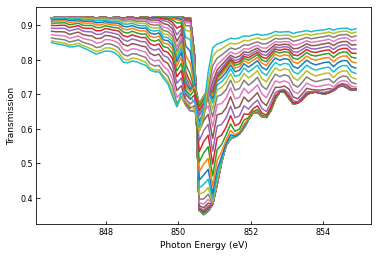

In [17]:
plt.figure()
plt.plot(enax_abs,(fl_dep_spectrum_T/fl_dep_spectrum_I));
plt.xlabel('Photon Energy (eV)')
plt.ylabel('Transmission')
plt.savefig(save_path+'raw_results.png')

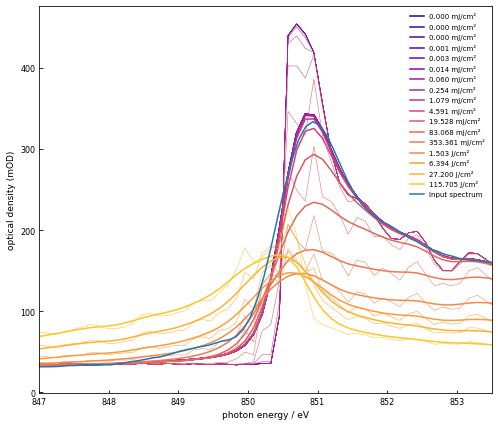

In [18]:


T = fl_dep_spectrum_T/fl_dep_spectrum_I
import matplotlib as mpl
plotcols =  mpl.cm.plasma(np.linspace(.0,0.9,N_local_fluences_to_calculate))#YlOrRd_r

#fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
plt.rcParams.update({'font.size': 9})
fig = plt.figure(figsize =(2*3.5,2*3.))

dE = np.mean(enax_rel[1:]-enax_rel[:-1])

for i in range(N_local_fluences_to_calculate)[:]:
    if np.mod(i,3)==0:
        spec = 1e3*np.log10(1/T[:,i])
        spec_sm = XNLdyn.reconvolve(enax_abs, spec,aufloesung)
        
        #spec_sm = sc.ndimage.gaussian_filter(spec,aufloesung/dE)
        plt.plot(enax_abs,spec, color = plotcols[i], lw=0.5)
        fluence_J = fluences_simulated_joules_nm2[i]*1e14
        lab = f'{fluence_J:.3f} J/cm²' if fluence_J >1 else f'{fluence_J*1e3:.3f} mJ/cm²' 
        plt.plot(enax_abs,spec_sm, color = plotcols[i], label = lab)


plt.plot(ld['Enax'][10:-10], 1e3*ld['Spectrum_sm0'][10:-10], label = 'Input spectrum')
plt.legend(fontsize = 7)

#plt.title('Results for homogeneous illumination')
plt.ylabel('optical density (mOD)')
plt.xlabel('photon energy / eV')
plt.tight_layout()
plt.xlim(847, 853.5)

plt.savefig('./plots/homogeneous_spectra.png', dpi = 600)
plt.savefig(save_path+'homogeneous_spectra.png')




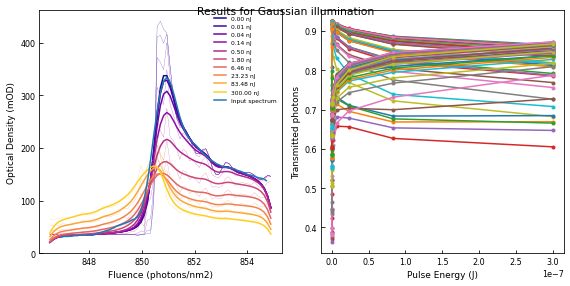

In [19]:
# These are the pulse energies for which we evaluate stuff
final_pulse_energies = np.logspace(np.log10(1e-4/N_pulse_energies), np.log10(1), N_pulse_energies)* pulse_energy_max

final_transmissions = np.zeros((N_points_E, N_pulse_energies))
final_incidence_check = np.zeros((N_points_E, N_pulse_energies))
final_incidence_peaks = np.zeros(N_pulse_energies)
for i_photen in range(N_points_E):

    for ipe, pulse_en in enumerate(final_pulse_energies):
        local_fluences, dA = XNLdyn.calculate_fluences(Nsteps_r, pulse_en, pulse_profile_sigma)
        
        
        # Assert that the requested results are in the calculated range
        assert np.min(local_fluences)+1e-20>=np.min(fluences_simulated_joules_nm2)
        assert np.max(local_fluences)<np.max(fluences_simulated_joules_nm2)*1.01
        
        local_transmitted = np.interp(local_fluences, fluences_simulated_joules_nm2,
                                      fl_dep_spectrum_T[i_photen,:])# tr[:, 0]
        final_transmissions[i_photen,ipe] = np.sum(local_transmitted*dA)

        
        local_incidence_check = np.interp(local_fluences, fluences_simulated_joules_nm2,
                                          fl_dep_spectrum_I[i_photen,:])

        final_incidence_check[i_photen,ipe] = np.sum(local_incidence_check*dA) # should result equal final_pulse_energies
        final_incidence_peaks[ipe] = np.max(local_incidence_check) 
        
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
fig.suptitle('Results for Gaussian illumination')

plt.sca(ax1)

plotcols =  mpl.cm.plasma(np.linspace(.0,0.9,N_pulse_energies))#YlOrRd_r
for i in range(N_pulse_energies):
    spec = 1e3*np.log10(final_incidence_check[:,i]/final_transmissions[:,i])
    #spec_sm = sc.ndimage.gaussian_filter(spec,aufloesung/dE)
    spec_sm = XNLdyn.reconvolve(enax_abs, spec,aufloesung)

    ax1.plot(enax_abs, spec, color = plotcols[i], lw=0.2)#, label ='For one z-stack'

    ax1.plot(enax_abs, spec_sm, color = plotcols[i], label = f'{final_pulse_energies[i]*1e9:.2f} nJ')#, label ='For one z-stack'

plt.plot(ld['Enax'][10:-10], 1e3*ld['Spectrum_sm0'][10:-10], label = 'Input spectrum')

plt.xlabel('Fluence (photons/nm2)')
plt.ylabel('Optical Density (mOD)')
ax1.legend(fontsize = 6)

plt.sca(ax2)
plt.plot(final_pulse_energies, (final_transmissions/final_incidence_check).T, '.-')

plt.xlabel('Pulse Energy (J)')
plt.ylabel('Transmitted photons')
#plt.legend(loc = 'lower left')
plt.tight_layout()

In [20]:
np.max(final_pulse_energies*XNLdyn.photons_per_J(PAR.E_i_abs[0]) / final_incidence_check[0,:])

0.9955216887656044

In [21]:
final_pulse_energies*XNLdyn.photons_per_J(PAR.E_i_abs[0])

array([2.19900496e+04, 7.90281407e+04, 2.84012412e+05, 1.02068769e+06,
       3.66816135e+06, 1.31826884e+07, 4.73761257e+07, 1.70260968e+08,
       6.11886192e+08, 2.19900496e+09])

In [22]:
1e14*final_incidence_peaks[:]/XNLdyn.photons_per_J(PAR.E_i_abs[0])

array([1.86500851e-03, 6.70249304e-03, 2.40875111e-02, 8.65660265e-02,
       3.11102169e-01, 1.11804323e+00, 4.01803904e+00, 1.44400836e+01,
       5.18949697e+01, 1.86500851e+02])

In [23]:
final_incidence_check[0,:]

array([2.20889711e+04, 7.93836458e+04, 2.85290030e+05, 1.02527921e+06,
       3.68466242e+06, 1.32419902e+07, 4.75892453e+07, 1.71026880e+08,
       6.14638738e+08, 2.20889709e+09])

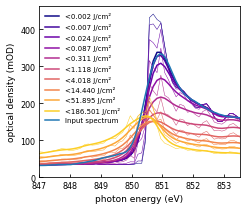

In [24]:
plt.rcParams.update({'font.size': 9})
fig = plt.figure(figsize =(3.5,3.))
for i in range(N_pulse_energies)[::]:
    spec = 1e3*np.log10(final_incidence_check[:,i]/final_transmissions[:,i])
#    spec_sm = sc.ndimage.gaussian_filter(spec,aufloesung/dE)
    spec_sm = XNLdyn.reconvolve(enax_abs, spec,aufloesung)

    plt.plot(enax_abs, spec, color = plotcols[i], lw=0.5)#, label ='For one z-stack'

    #plt.plot(enax_abs, spec_sm, color = plotcols[i], label = f'{final_pulse_energies[i]*1e6:.2f} µJ')#, label ='For one z-stack'
    #fluence_J = final_pulse_energies[i]
    #{fluence_J*1e9:.3f} nJ,  
    lab =  f'<{1e14*final_incidence_peaks[i]/XNLdyn.photons_per_J(PAR.E_i_abs[0]):.3f} J/cm²' 
    plt.plot(enax_abs, spec_sm, color = plotcols[i], label =lab)

plt.plot(ld['Enax'][10:-10], 1e3*ld['Spectrum_sm0'][10:-10], label = 'Input spectrum')
plt.legend(fontsize = 7)
plt.xlabel('photon energy (eV)')
plt.ylabel('optical density (mOD)')
#plt.title('Spot reconstruction')
plt.tight_layout()
plt.xlim(847, 853.5)
plt.savefig('./plots/final_spectra.png', dpi = 600)

plt.savefig(save_path+'final_spectra.png')


In [25]:
save_dict = {}
# General stuff
save_dict['PAR']           = PAR      # General Simulation Parameters
save_dict['pulse_energy_max']    = pulse_energy_max  # Max simulated pulse energy
save_dict['N_local_fluences_to_calculate'] = N_local_fluences_to_calculate # No of z-stacks calculated in pulse energy
# Parameters for z-stacks
save_dict['load_spectrum_file']  = deconv_spectrum_file  # Spectrum from which absorption cross-sections are derived
save_dict['N_points_E']          = N_points_E        # No of photon energy points in the spectrum
save_dict['enax_abs']            = enax_abs          # Energy axis of the simulated spectrum
save_dict['aufloesung']          = aufloesung        # Resolution of with which the spectrum is convoluted at the end
save_dict['fl_dep_spectrum_I']   = fl_dep_spectrum_I # Matrix with the incident pulse energies of z-stacks
save_dict['fl_dep_spectrum_T']   = fl_dep_spectrum_T # Matrix with the transmitted pulse energies of z-stacks
# Parameters for spots
save_dict['N_pulse_energies']    = N_pulse_energies  # No of final pulse energies of in the spots
save_dict['final_pulse_energies']= final_pulse_energies # Final pulse energies of the spots
save_dict['pulse_profile_sigma'] = pulse_profile_sigma # Size of the Gaussian spots (nm)
save_dict['Nsteps_r']            = Nsteps_r          # No of points in the radial integration of the spot
save_dict['final_incidence']     = final_incidence_check # Matrix with incident energies of spots
save_dict['final_incidence_peaks'] = final_incidence_peaks # Matrix with peak incident pulse energies of spots
save_dict['final_transmissions'] = final_transmissions # Matrix with transmissions of spots


with open(save_path+'save_dict.pi','wb') as file:
    pickle.dump(save_dict, file)


In [26]:
fl_dep_spectrum_I

array([[7.41206447e-07, 1.20097448e-06, 1.94593518e-06, ...,
        5.25877928e+03, 8.52078358e+03, 1.38061989e+04],
       [7.41098299e-07, 1.20079925e-06, 1.94565125e-06, ...,
        5.25801199e+03, 8.51954032e+03, 1.38041845e+04],
       [7.40990183e-07, 1.20062407e-06, 1.94536741e-06, ...,
        5.25724486e+03, 8.51829738e+03, 1.38021706e+04],
       ...,
       [7.34135726e-07, 1.18951781e-06, 1.92737198e-06, ...,
        5.20861323e+03, 8.43949974e+03, 1.36744949e+04],
       [7.34029632e-07, 1.18934591e-06, 1.92709344e-06, ...,
        5.20786057e+03, 8.43828014e+03, 1.36725187e+04],
       [7.33923567e-07, 1.18917405e-06, 1.92681498e-06, ...,
        5.20710804e+03, 8.43706081e+03, 1.36705432e+04]])

In [27]:
final_incidence_check

array([[2.20889711e+04, 7.93836458e+04, 2.85290030e+05, 1.02527921e+06,
        3.68466242e+06, 1.32419902e+07, 4.75892453e+07, 1.71026880e+08,
        6.14638738e+08, 2.20889709e+09],
       [2.20857482e+04, 7.93720631e+04, 2.85248404e+05, 1.02512961e+06,
        3.68412480e+06, 1.32400581e+07, 4.75823016e+07, 1.71001926e+08,
        6.14549057e+08, 2.20857480e+09],
       [2.20825262e+04, 7.93604837e+04, 2.85206789e+05, 1.02498006e+06,
        3.68358733e+06, 1.32381265e+07, 4.75753599e+07, 1.70976978e+08,
        6.14459400e+08, 2.20825258e+09],
       [2.20793051e+04, 7.93489077e+04, 2.85165188e+05, 1.02483055e+06,
        3.68305002e+06, 1.32361955e+07, 4.75684203e+07, 1.70952038e+08,
        6.14369769e+08, 2.20793048e+09],
       [2.20760849e+04, 7.93373351e+04, 2.85123598e+05, 1.02468108e+06,
        3.68251287e+06, 1.32342651e+07, 4.75614828e+07, 1.70927107e+08,
        6.14280174e+08, 2.20760847e+09],
       [2.20728657e+04, 7.93257659e+04, 2.85082020e+05, 1.02453166e+06,
   

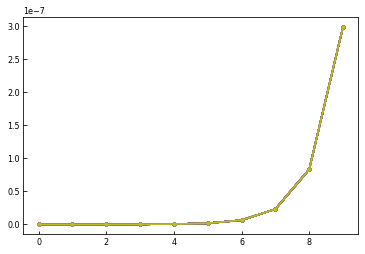

In [28]:
plt.figure()
#plt.plot((1/XNLdyn.photons_per_J(enax_abs))*final_transmissions.T,\
#          1/XNLdyn.photons_per_J(enax_abs)*final_incidence_check.T,'--');
plt.plot((1/XNLdyn.photons_per_J(enax_abs))*final_incidence_check.T,'.-');
#plt.plot(final_pulse_energies,'x')

In [29]:
m_e = 9.1e-31 #kg
e = 1.6e-19 #C
E = 850*e
v_e=np.sqrt(E/m_e)#*1e9*1e15 # nm/fs

In [30]:
1e18*1e-9/v_e

81.79961167749047